In [1]:
import pandas as pd
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
plotly.offline.init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib_venn import venn2, venn3
import os
import numpy as np

In [2]:
# Global options

sns.set_style("white")
sns.set(font_scale=2, style="ticks")

height=15
aspect=1
x_jitter=0
y_jitter=0

xlim=(-10,10)
ylim=(-10, 10)
alpha=1
marker='.'
s=1
legend=True
legend_out=False
linewidth=0
x_jitter=0
y_jitter=0
plt.rcParams["figure.figsize"] = (20,20)

In [3]:
def prepare_df(df_path, df_name):

    """Read in information from dataframe"""

    # read in df1
    df = pd.read_csv(df_path, header=0, sep="\t")
    # Mark significants
    df["Significant"]  = "No"
    df.loc[(df["FDR"] < 0.05), "Significant"] = "FDR<0.05"
    # set id as index
    df.set_index("id", inplace=True)
    # rename columns
    df.columns = df.columns + "_" + df_name
    # reset index
    df.reset_index(inplace=True)

    return df

In [4]:
def plot_MA(df, df_name):

    """Plot MA"""
    sns_plot = sns.lmplot(x=f"logCPM_{df_name}",
                          y=f"logFC_{df_name}",
                          data=df,
                          fit_reg=False,
                          hue=f"Significant_{df_name}",
                          hue_order=["No", "FDR<0.05"],
                          palette=["black", "blue"],
                          scatter_kws={'alpha':alpha},
                          height=height,
                          aspect=aspect,
                          x_jitter=x_jitter,
                          y_jitter=y_jitter,
                          markers=marker,
                          legend=legend)
    sns_plot = plt.gca()
    sns_plot.set_title(f"MA plot for {df_name}")
    sns_plot.spines['right'].set_visible(True)
    sns_plot.spines['top'].set_visible(True)
#     sns_plot.set(xlim=xlim, ylim=ylim)

In [5]:
def merge_df(df_1, df_2):
    
    """Merge dataframes"""
    
    df = pd.merge(df_1, df_2, on="id", how="inner")
    df["Significant"] = "No"
    return df

In [6]:
def plot_FC_correlation(df, FC_1_name, FC_2_name, hue, hue_order):

    """Plot correlation between FCs"""

    sns_plot = sns.lmplot(f"logFC_{FC_1_name}",
                          y=f"logFC_{FC_2_name}",
                          data=df,
                          fit_reg=False,
                          hue=hue,
                          hue_order=hue_order,
                          palette=["black", "blue", "red", "sienna"],
                          scatter_kws={'alpha':alpha},
                          height=height,
                          aspect=aspect,
                          x_jitter=x_jitter,
                          y_jitter=y_jitter,
                          markers=marker,
                          legend=legend)
    sns_plot = plt.gca()
    sns_plot.set_title(f"FCs between {FC_1_name} and {FC_2_name}")
    sns_plot.spines['right'].set_visible(True)
    sns_plot.spines['top'].set_visible(True)
#     sns_plot.set(xlim=xlim, ylim=ylim)


In [7]:
def compare(df_1_path, df_2_path, df_1_name, df_2_name):
    
    "Combine multiple functions"
    
    df_1 = prepare_df(df_1_path, df_1_name)
    plot_MA(df_1, df_1_name)
    df_2 = prepare_df(df_2_path, df_2_name)
    plot_MA(df_2, df_2_name)
    
    df_merged = merge_df(df_1, df_2)
    
#     plot_FC_correlation(df_merged, df_1_name, df_2_name, hue="Significant")
#     plot_FC_correlation(df_merged, df_1_name, df_2_name, hue="Significant_" + df_1_name)
#     plot_FC_correlation(df_merged, df_1_name, df_2_name, hue="Significant_" + df_2_name)
    
    return df_merged

In [8]:
def plot_merged_MA_plot(df_1_path, df_2_path, df_1_name, df_2_name):

    df_all = compare(df_1_path, df_2_path, df_1_name, df_2_name)

    df_all["Significant"] = "No"

    df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05), "Significant"] = f"FDR_{df_2_name}<0.05"

    df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05) &
               (df_all[f"FDR_{df_1_name}"]<0.05) &
               (df_all[f"logFC_{df_1_name}"]>0),
                "Significant"] = f"FDR_{df_2_name}<0.05\nFDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0"


    sns_plot = sns.lmplot(x=f"logCPM_{df_2_name}",
                          y=f"logFC_{df_2_name}",
                          data=df_all,
                          fit_reg=False,
                          hue=f"Significant",
                          hue_order=["No", f"FDR_{df_2_name}<0.05", f"FDR_{df_2_name}<0.05\nFDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0"],
                          palette=["black", "blue", "red"],
                          scatter_kws={'alpha':alpha},
                          height=height,
                          aspect=aspect,
                          x_jitter=x_jitter,
                          y_jitter=y_jitter,
                          markers=marker,
                          legend=legend)


    sns_plot = plt.gca()
    sns_plot.set_title(f"MA plot")
    sns_plot.spines['right'].set_visible(True)
    sns_plot.spines['top'].set_visible(True)
    sns_plot.set(xlim=xlim, ylim=ylim)

    print(pd.DataFrame(df_all["Significant"].value_counts()))

In [9]:
# Input prefix
ips_prefix = "../03_WAGO_IPs/results/filter/DE_htseq_count__alignment_sorted_filtered_unique_mappers__reverse__"

wago_3__ip_collab_prefix = "..//WAGO_3_IP/results/filter/DE_htseq_count__alignment_sorted_filtered_unique_mappers__reverse__"

small_rna_seq_prefix = "../01_small_RNA_seq_15_C/results/filter/DE_htseq_count__alignment_sorted_filtered_unique_mappers__reverse__"

In [10]:
suffix = "/DE_edgeR/final_table_with_gene_info.tsv"

In [11]:
# IPs

# WAGO-1
ip__Input_WAGO_1__IP_WAGO_1_path = ips_prefix + "Input_WAGO-1__IP_WAGO-1" + suffix
ip__Input_WAGO_1__IP_WAGO_1_name = "IP_WAGO-1__over__Input_WAGO-1"

ip__Input_WAGO_1_P3G__IP_WAGO_1_P3G_path = ips_prefix + "Input_WAGO-1_P3G__IP_WAGO-1_P3G" + suffix
ip__Input_WAGO_1_P3G__IP_WAGO_1_P3G_name = "IP_WAGO-1_P3G__over__Input_WAGO-1_P3G"

ip__Input_WAGO_1_dpf_3_null__IP_WAGO_1_dpf_3_null_path = ips_prefix + "Input_WAGO-1_dpf-3_null__IP_WAGO-1_dpf-3_null" + suffix
ip__Input_WAGO_1_dpf_3_null__IP_WAGO_1_dpf_3_null_name = "IP_WAGO-1_dpf-3_null__over__Input_WAGO-1_dpf-3_null"

ip__IP_WAGO_1_P3G__IP_WAGO_1_path = ips_prefix + "IP_WAGO-1_P3G__IP_WAGO-1" + suffix
ip__IP_WAGO_1_P3G__IP_WAGO_1_name = "IP_WAGO-1__over__IP_WAGO-1_P3G"

ip__IP_WAGO_1_dpf_3_null__IP_WAGO_1_path = ips_prefix + "IP_WAGO-1_dpf-3_null__IP_WAGO-1" + suffix
ip__IP_WAGO_1_dpf_3_null__IP_WAGO_1_name = "IP_WAGO-1__over__IP_WAGO-1_dpf-3_null"

# WAGO-3
ip__Input_WAGO_3__IP_WAGO_3_path = ips_prefix + "Input_WAGO-3__IP_WAGO-3" + suffix
ip__Input_WAGO_3__IP_WAGO_3_name = "IP_WAGO-3__over__Input_WAGO-3"

# WAGO-3 collab
ip_N2_Input_Rpph__N2_xf119_Rpph_path = wago_3__ip_collab_prefix + "N2_Input_Rpph__N2_xf119_Rpph" + suffix
ip_N2_Input_Rpph__N2_xf119_Rpph_name = "N2_xf119_Rpph__over__N2_Input_Rpph"

# small RNA seq
WT__Dpf_3_null_path = small_rna_seq_prefix + "WT__Dpf_3_null" + suffix
WT__Dpf_3_null_name = "small_RNA_seq_Dpf_3_null__over__small_RNA_seq_Dpf_3_null_WT"

#### important note: we perform an inner join in the merge

# 1. IP_WAGO-3__over__Input_WAGO-3 vs N2_xf119_Rpph__over__N2_Input_Rpph

In [12]:
# WAGO-3
ip__Input_WAGO_3__IP_WAGO_3_path = ips_prefix + "Input_WAGO-3__IP_WAGO-3" + suffix
ip__Input_WAGO_3__IP_WAGO_3_name = "IP_WAGO-3__over__Input_WAGO-3"

In [13]:
df_1_path = ip__Input_WAGO_3__IP_WAGO_3_path
df_1_name = ip__Input_WAGO_3__IP_WAGO_3_name

df_2_path = ip_N2_Input_Rpph__N2_xf119_Rpph_path
df_2_name = ip_N2_Input_Rpph__N2_xf119_Rpph_name

,Significant
No,1894
FDR_IP_WAGO-3__over__Input_WAGO-3<0.05\nlogFC_IP_WAGO-3__over__Input_WAGO-3>0\nFDR_N2_xf119_Rpph__over__N2_Input_Rpph<0.05\nlogFC_N2_xf119_Rpph__over__N2_Input_Rpph>0,1629
FDR_IP_WAGO-3__over__Input_WAGO-3<0.05\nlogFC_IP_WAGO-3__over__Input_WAGO-3>0,894
FDR_N2_xf119_Rpph__over__N2_Input_Rpph<0.05\nlogFC_N2_xf119_Rpph__over__N2_Input_Rpph>0,234


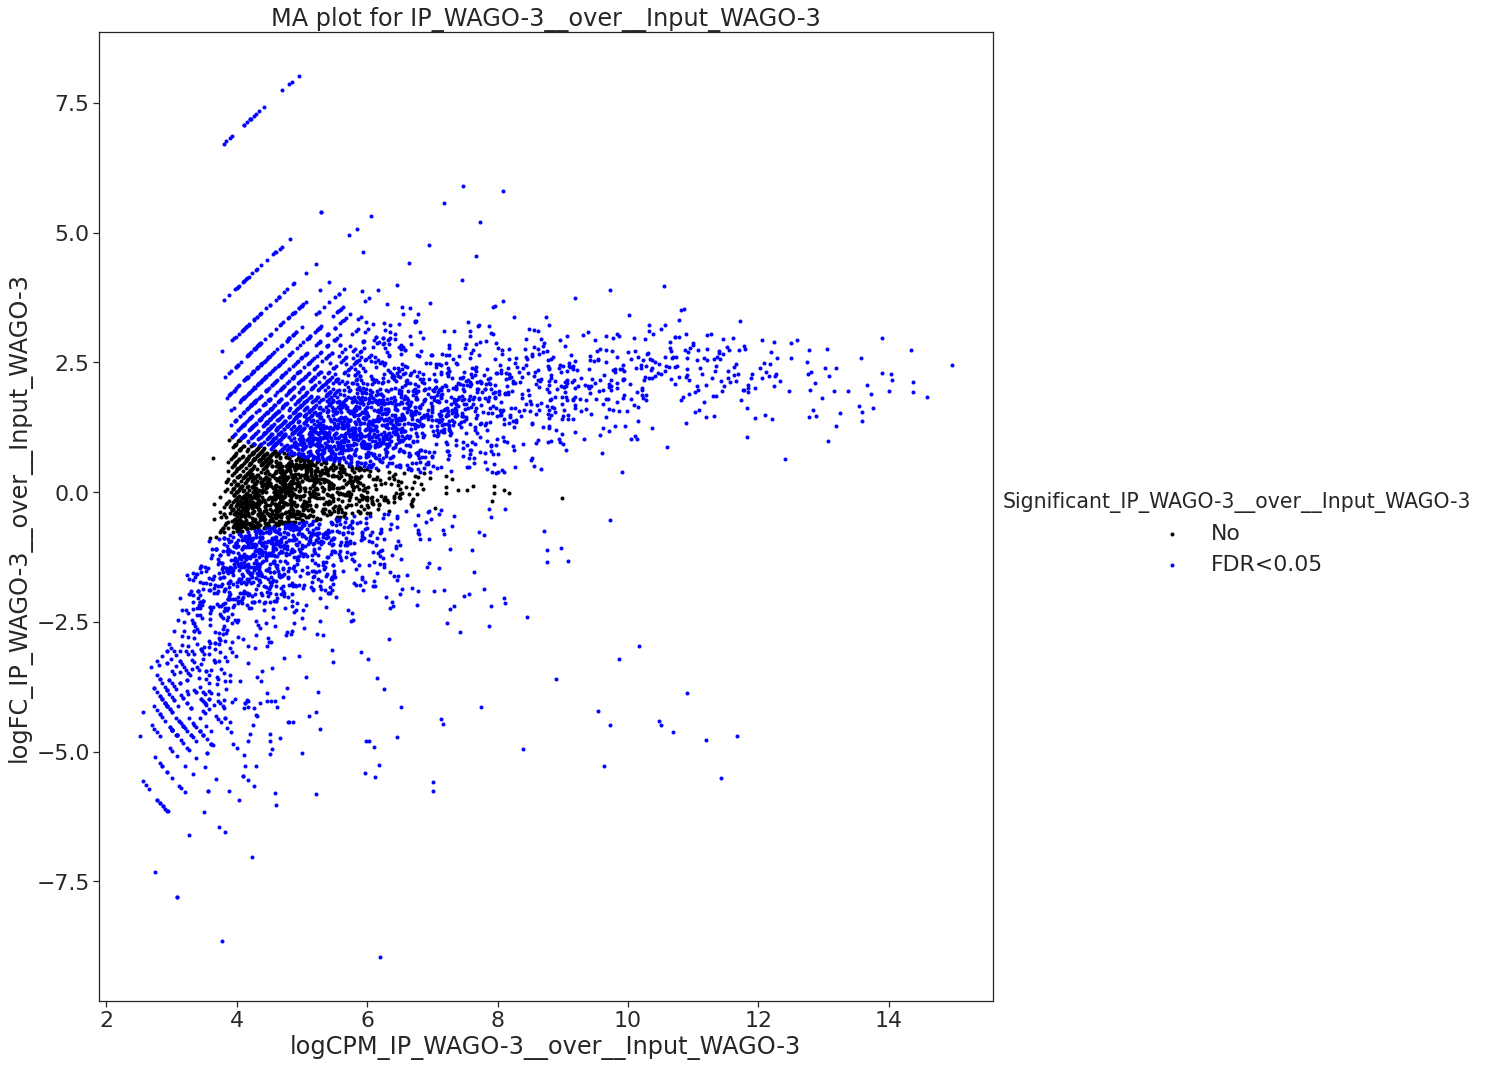

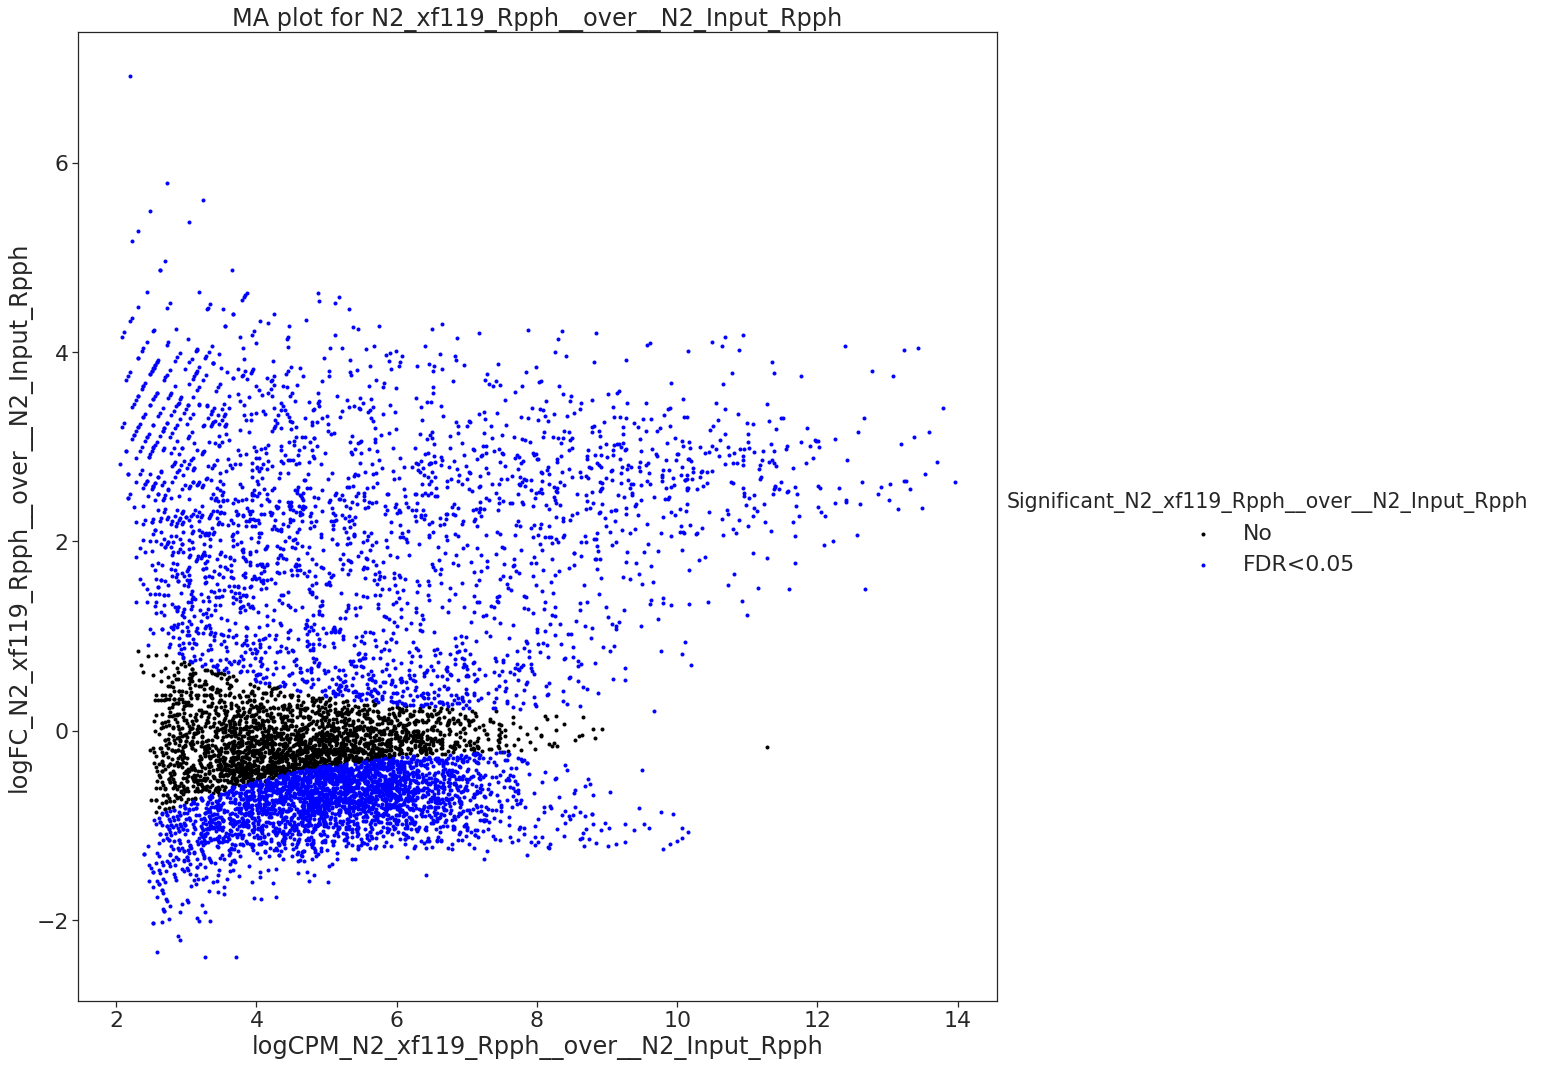

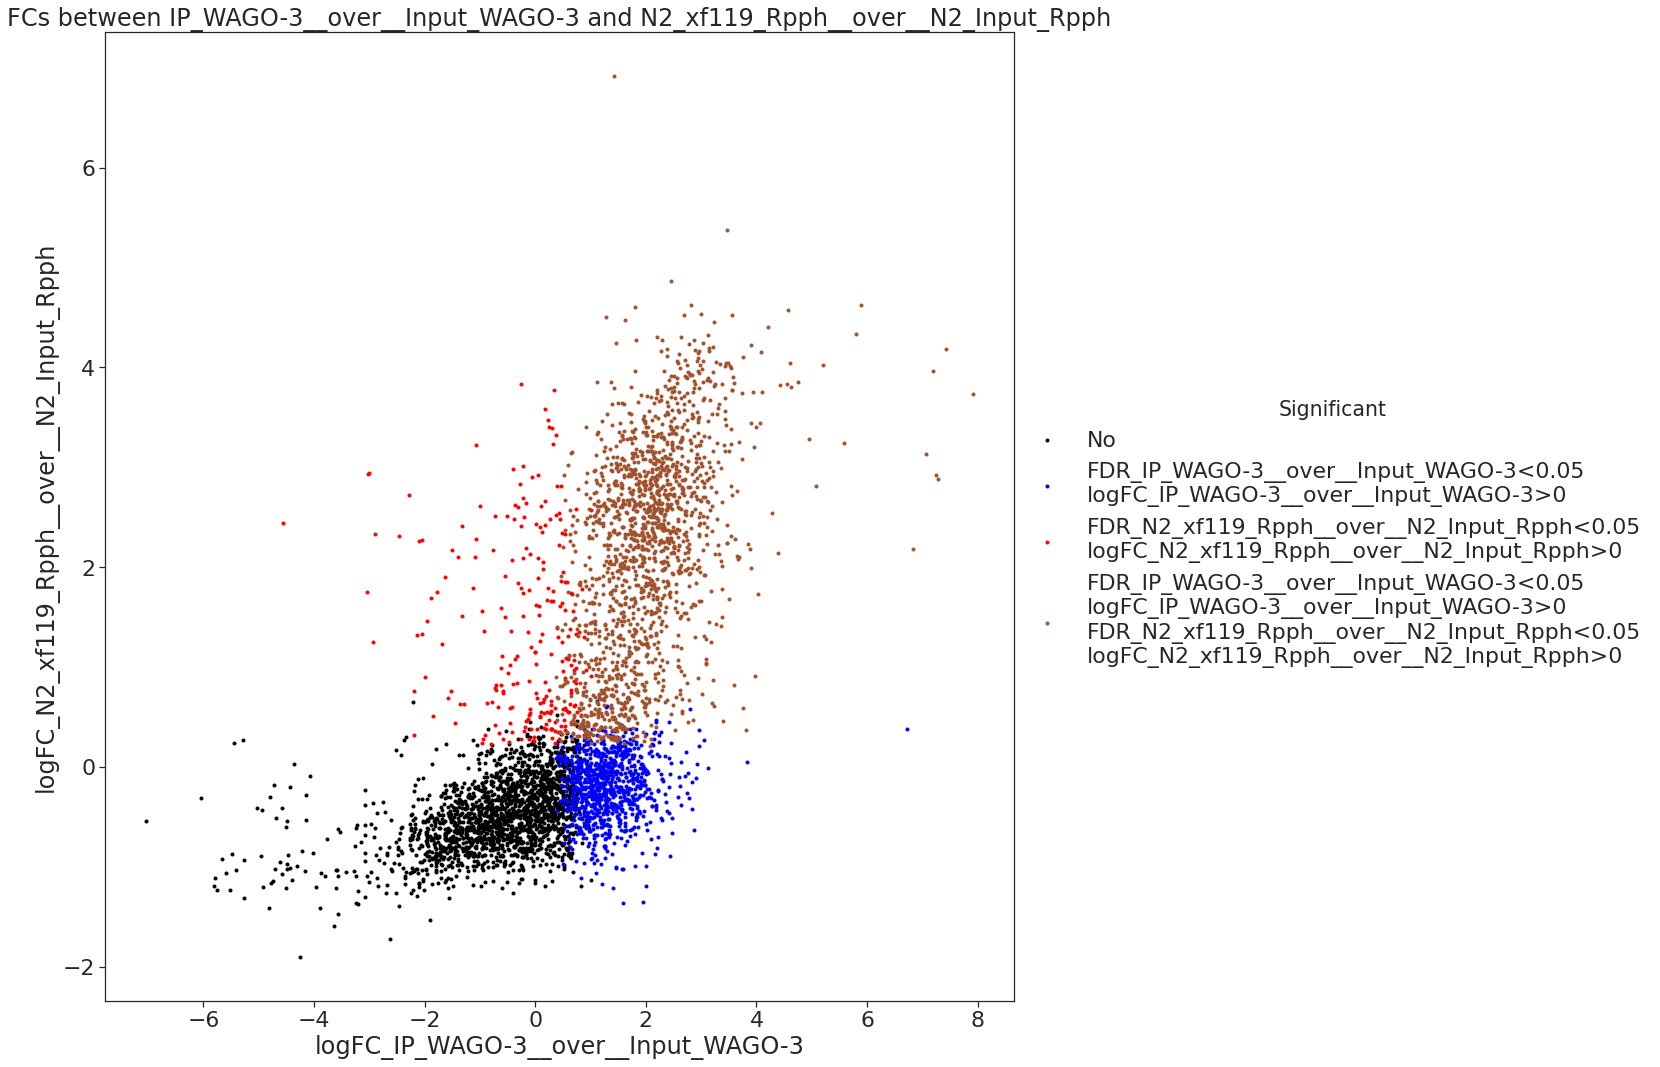

In [14]:
df_all = compare(df_1_path, df_2_path, df_1_name, df_2_name)

df_all["Significant"] = "No"

df_all.loc[(df_all[f"FDR_{df_1_name}"]<0.05) &
            (df_all[f"logFC_{df_1_name}"]>0),
            "Significant"] = f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0"

df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05) &
            (df_all[f"logFC_{df_2_name}"]>0),
            "Significant"] = f"FDR_{df_2_name}<0.05\nlogFC_{df_2_name}>0"

df_all.loc[(df_all[f"FDR_{df_1_name}"]<0.05) &
           (df_all[f"logFC_{df_1_name}"]>0) &
           (df_all[f"FDR_{df_2_name}"]<0.05) &
            (df_all[f"logFC_{df_2_name}"]>0),
            "Significant"] = f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0\nFDR_{df_2_name}<0.05\nlogFC_{df_2_name}>0"

plot_FC_correlation(df_all, df_1_name, df_2_name, "Significant", ["No", 
                                                                  f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0", 
                                                                  f"FDR_{df_2_name}<0.05\nlogFC_{df_2_name}>0",
                                                                  f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0\nFDR_{df_2_name}<0.05\nlogFC_{df_2_name}>0"])

pd.DataFrame(df_all["Significant"].value_counts())

# 2. IP_WAGO-1__over__Input_WAGO-1 vs N2_xf119_Rpph__over__N2_Input_Rpph

In [15]:
df_1_path = ip__Input_WAGO_1__IP_WAGO_1_path
df_1_name = ip__Input_WAGO_1__IP_WAGO_1_name

df_2_path = ip_N2_Input_Rpph__N2_xf119_Rpph_path
df_2_name = ip_N2_Input_Rpph__N2_xf119_Rpph_name

,Significant
No,2239
FDR_IP_WAGO-1__over__Input_WAGO-1<0.05\nlogFC_IP_WAGO-1__over__Input_WAGO-1>0\nFDR_N2_xf119_Rpph__over__N2_Input_Rpph<0.05\nlogFC_N2_xf119_Rpph__over__N2_Input_Rpph>0,1679
FDR_IP_WAGO-1__over__Input_WAGO-1<0.05\nlogFC_IP_WAGO-1__over__Input_WAGO-1>0,977
FDR_N2_xf119_Rpph__over__N2_Input_Rpph<0.05\nlogFC_N2_xf119_Rpph__over__N2_Input_Rpph>0,361


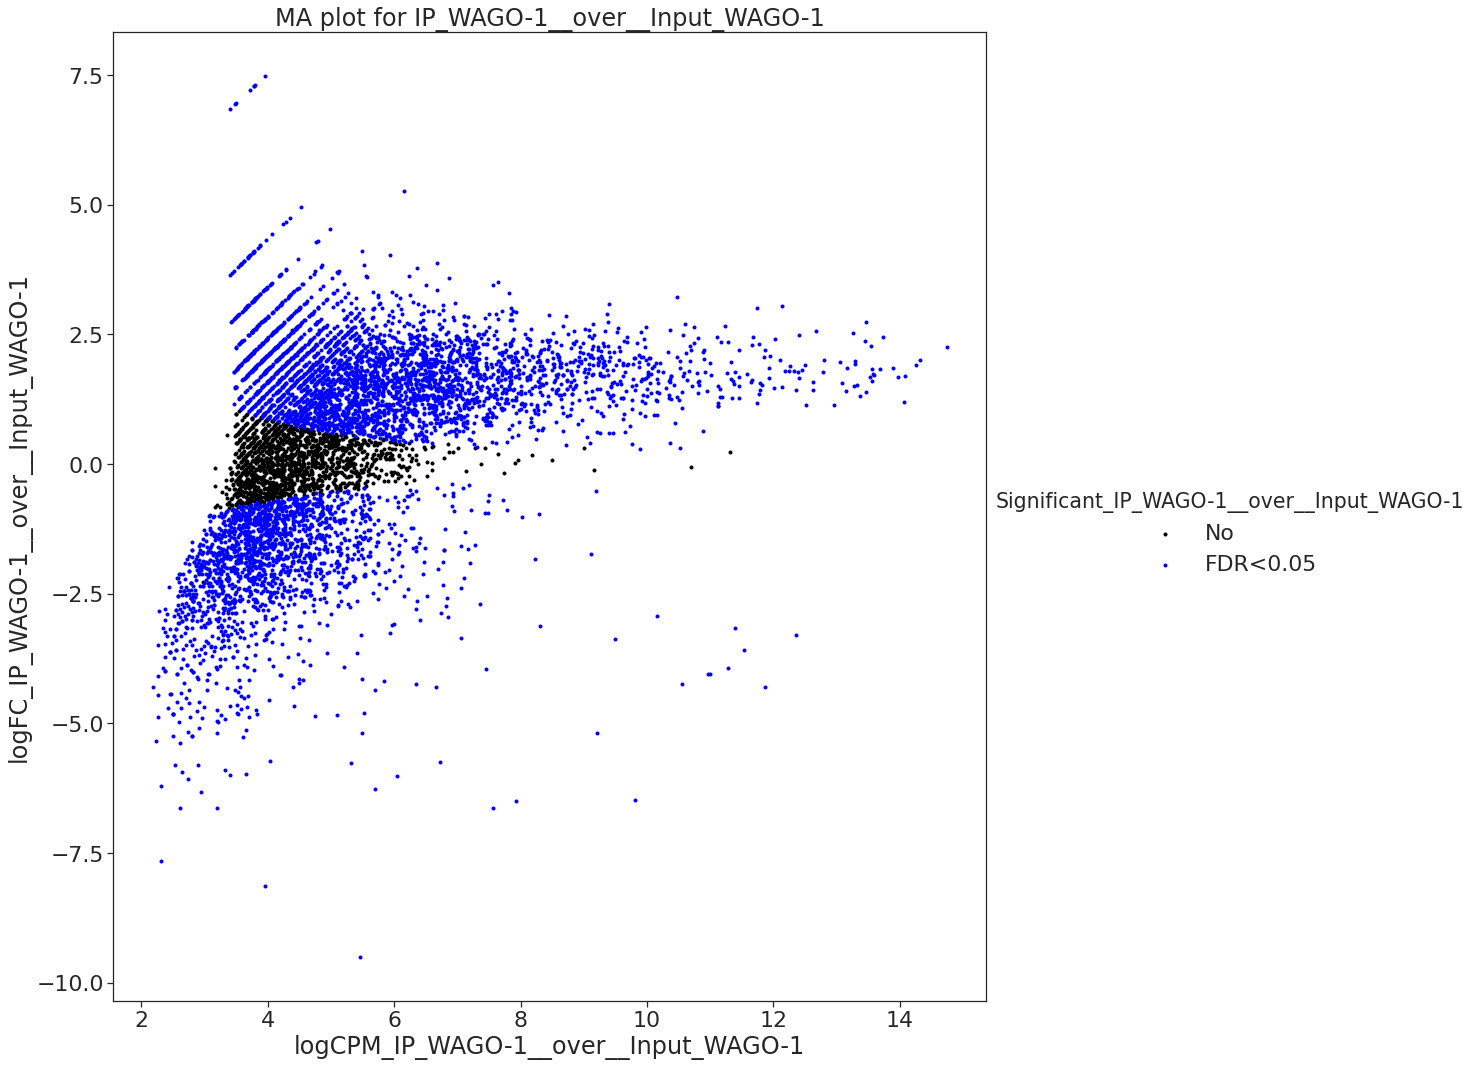

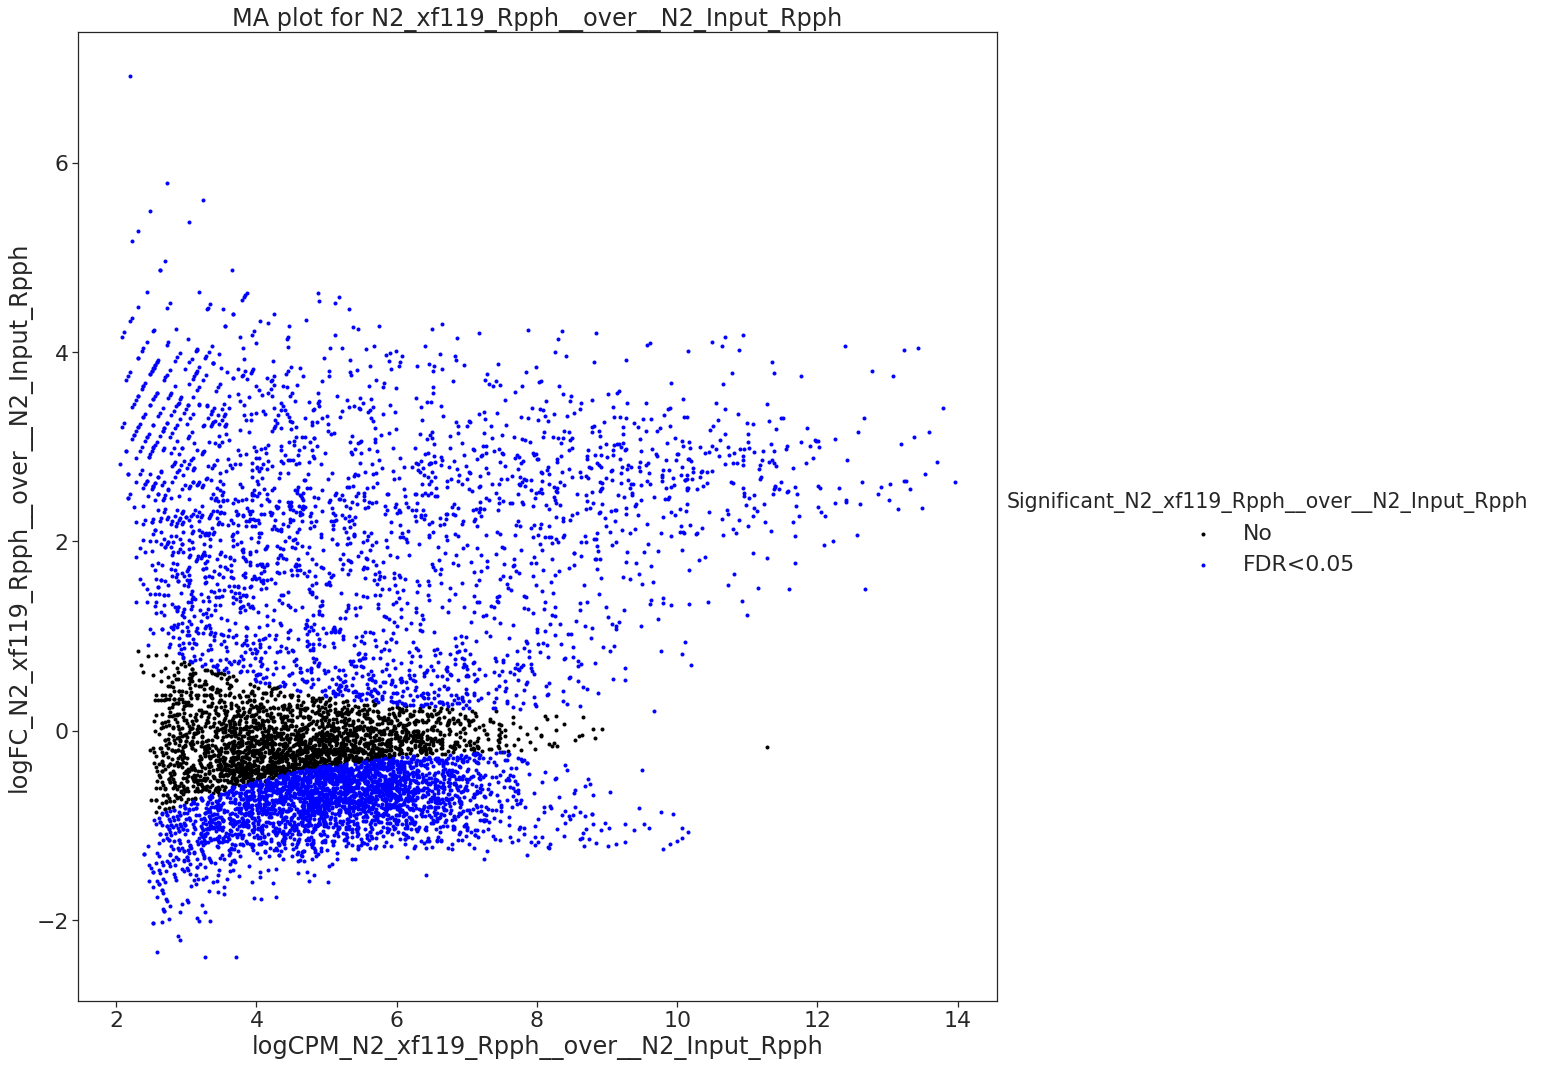

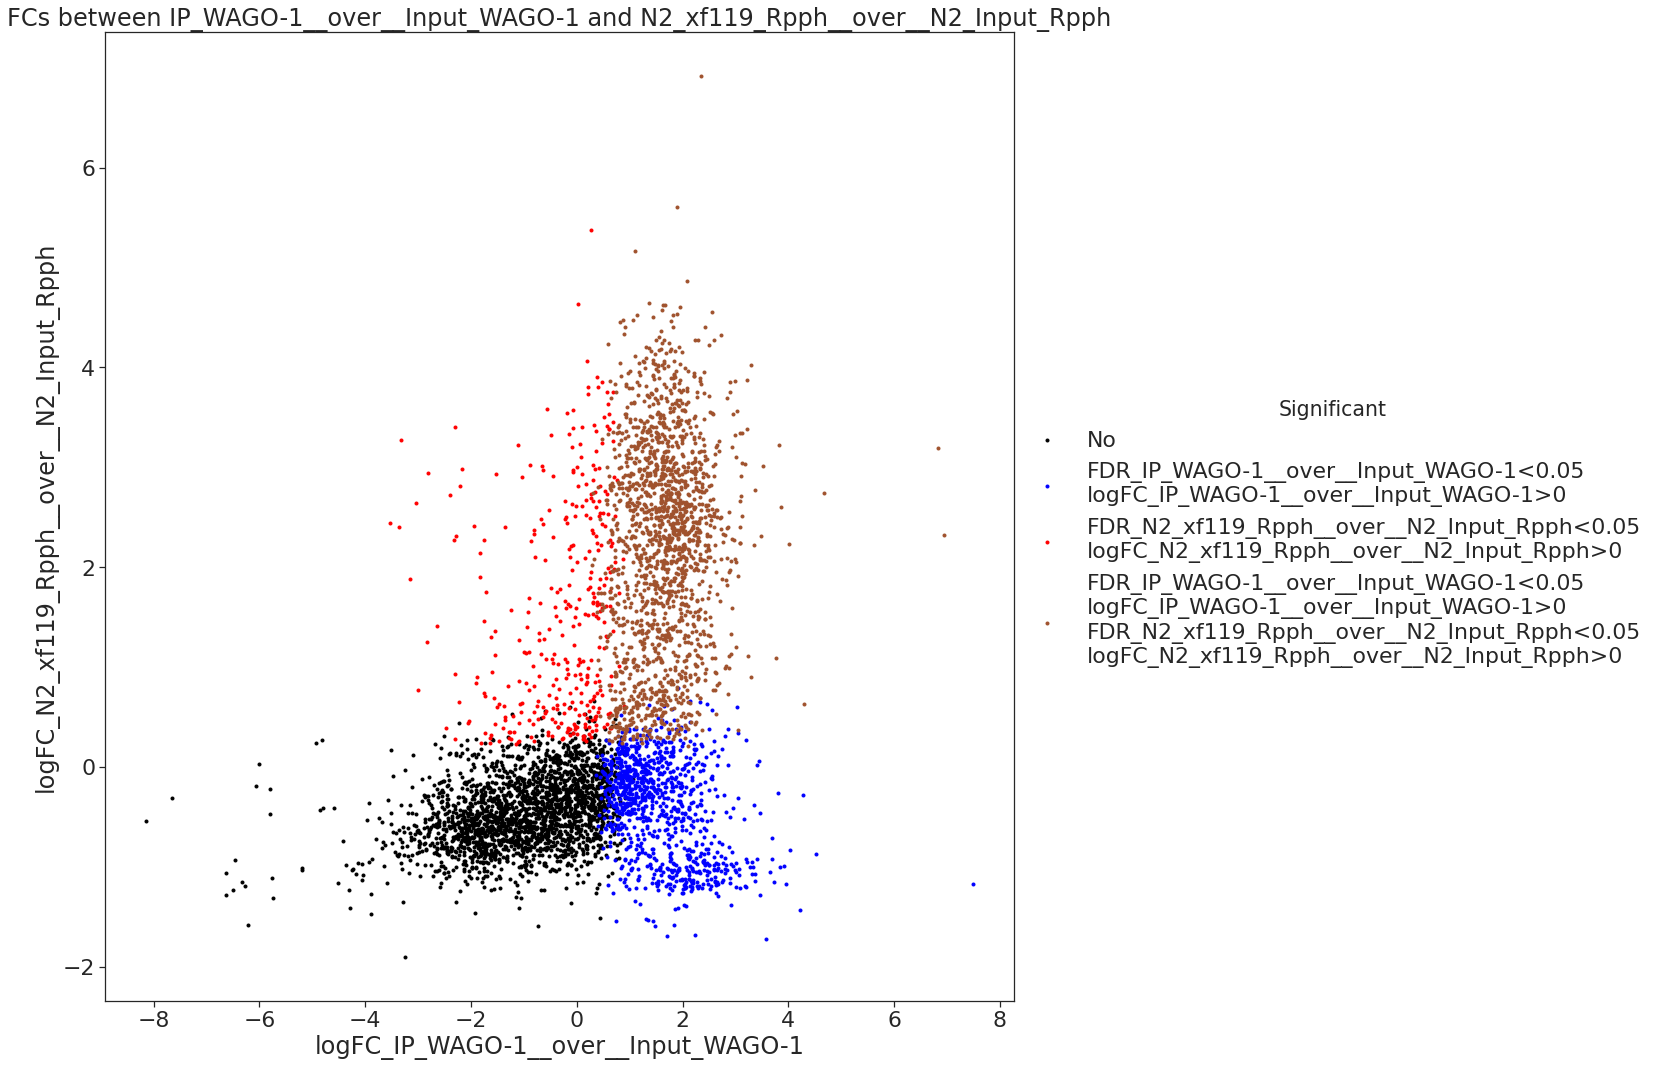

In [16]:
df_all = compare(df_1_path, df_2_path, df_1_name, df_2_name)

df_all["Significant"] = "No"

df_all.loc[(df_all[f"FDR_{df_1_name}"]<0.05) &
            (df_all[f"logFC_{df_1_name}"]>0),
            "Significant"] = f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0"

df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05) &
            (df_all[f"logFC_{df_2_name}"]>0),
            "Significant"] = f"FDR_{df_2_name}<0.05\nlogFC_{df_2_name}>0"

df_all.loc[(df_all[f"FDR_{df_1_name}"]<0.05) &
           (df_all[f"logFC_{df_1_name}"]>0) &
           (df_all[f"FDR_{df_2_name}"]<0.05) &
            (df_all[f"logFC_{df_2_name}"]>0),
            "Significant"] = f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0\nFDR_{df_2_name}<0.05\nlogFC_{df_2_name}>0"

plot_FC_correlation(df_all, df_1_name, df_2_name, "Significant", ["No", 
                                                                  f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0", 
                                                                  f"FDR_{df_2_name}<0.05\nlogFC_{df_2_name}>0",
                                                                  f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0\nFDR_{df_2_name}<0.05\nlogFC_{df_2_name}>0"])

pd.DataFrame(df_all["Significant"].value_counts())

# 3. IP_WAGO-1_P3G__over__Input_WAGO-1_P3G vs N2_xf119_Rpph__over__N2_Input_Rpph

In [17]:
df_1_path = ip__Input_WAGO_1_P3G__IP_WAGO_1_P3G_path
df_1_name = ip__Input_WAGO_1_P3G__IP_WAGO_1_P3G_name

df_2_path = ip_N2_Input_Rpph__N2_xf119_Rpph_path
df_2_name = ip_N2_Input_Rpph__N2_xf119_Rpph_name

,Significant
No,2589
FDR_IP_WAGO-1_P3G__over__Input_WAGO-1_P3G<0.05\nlogFC_IP_WAGO-1_P3G__over__Input_WAGO-1_P3G>0\nFDR_N2_xf119_Rpph__over__N2_Input_Rpph<0.05\nlogFC_N2_xf119_Rpph__over__N2_Input_Rpph>0,1641
FDR_IP_WAGO-1_P3G__over__Input_WAGO-1_P3G<0.05\nlogFC_IP_WAGO-1_P3G__over__Input_WAGO-1_P3G>0,973
FDR_N2_xf119_Rpph__over__N2_Input_Rpph<0.05\nlogFC_N2_xf119_Rpph__over__N2_Input_Rpph>0,364


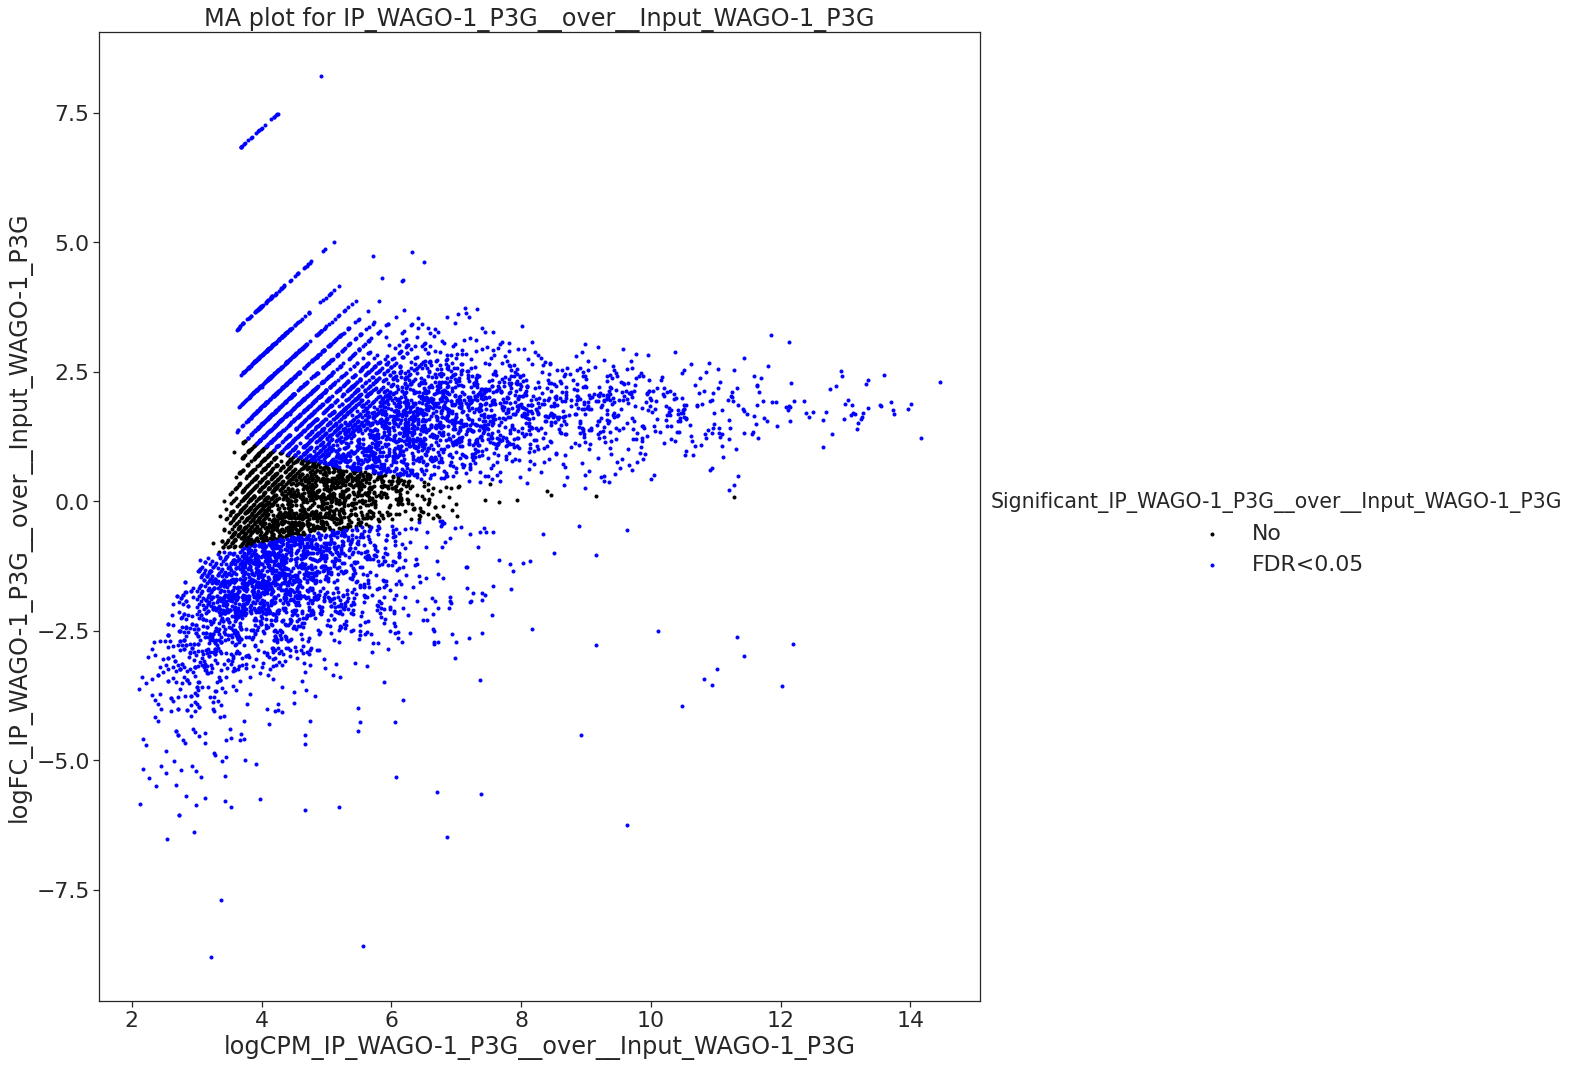

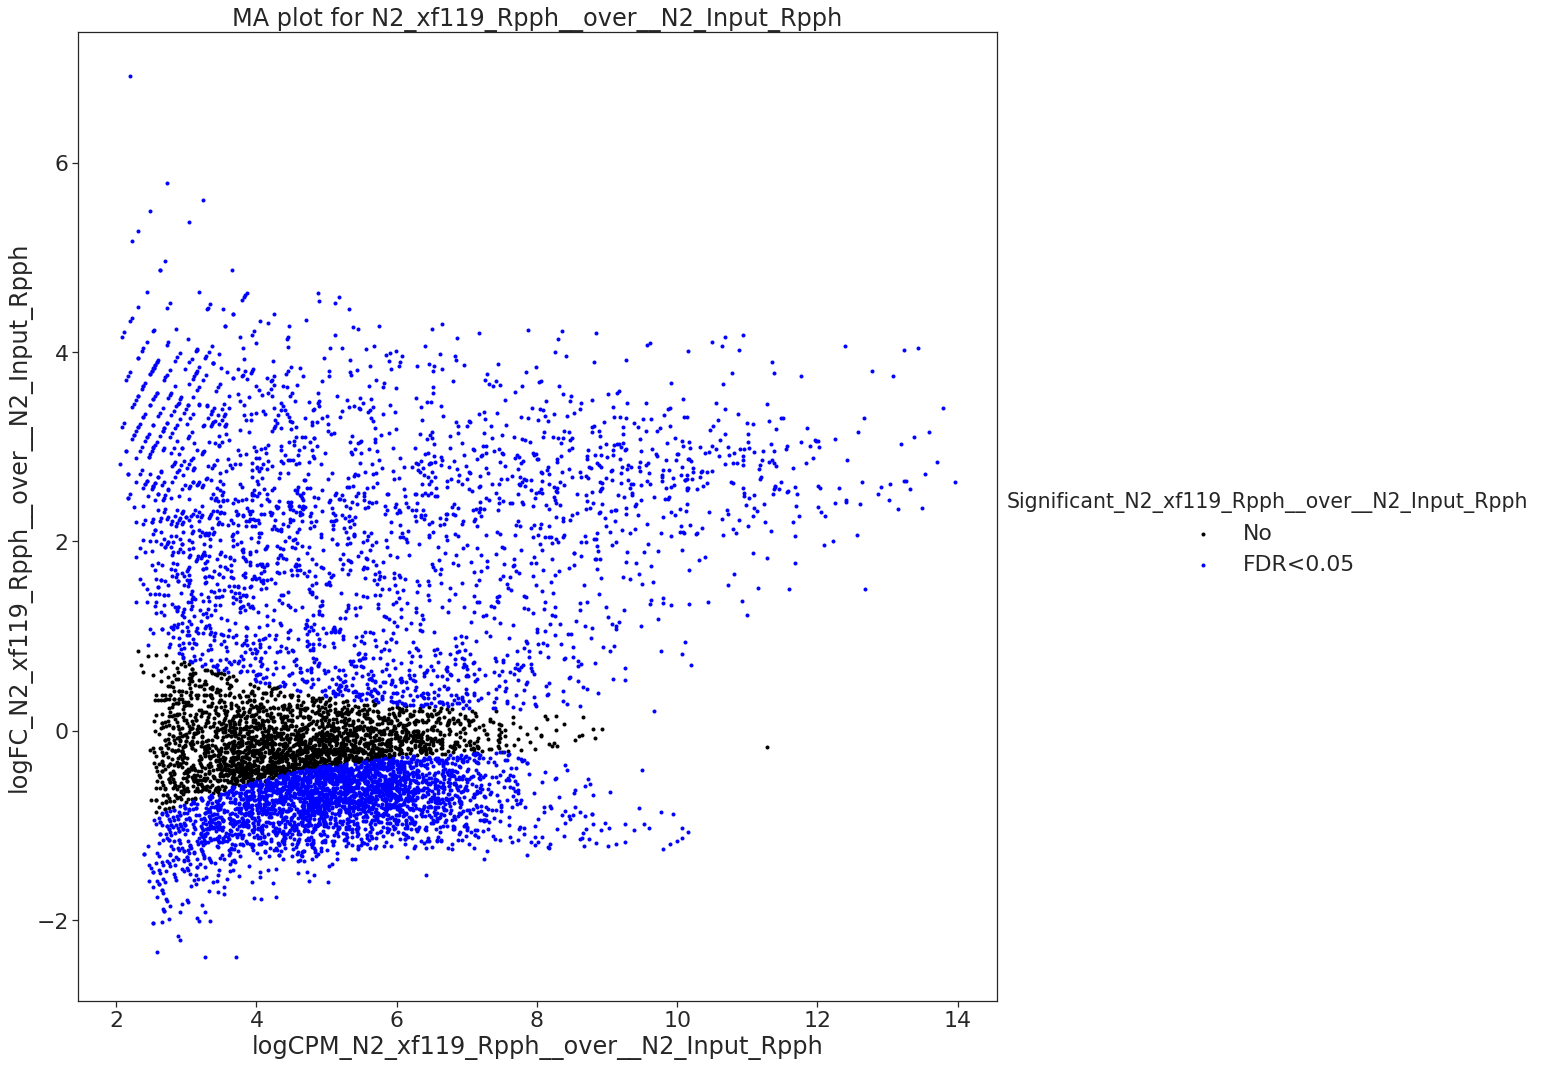

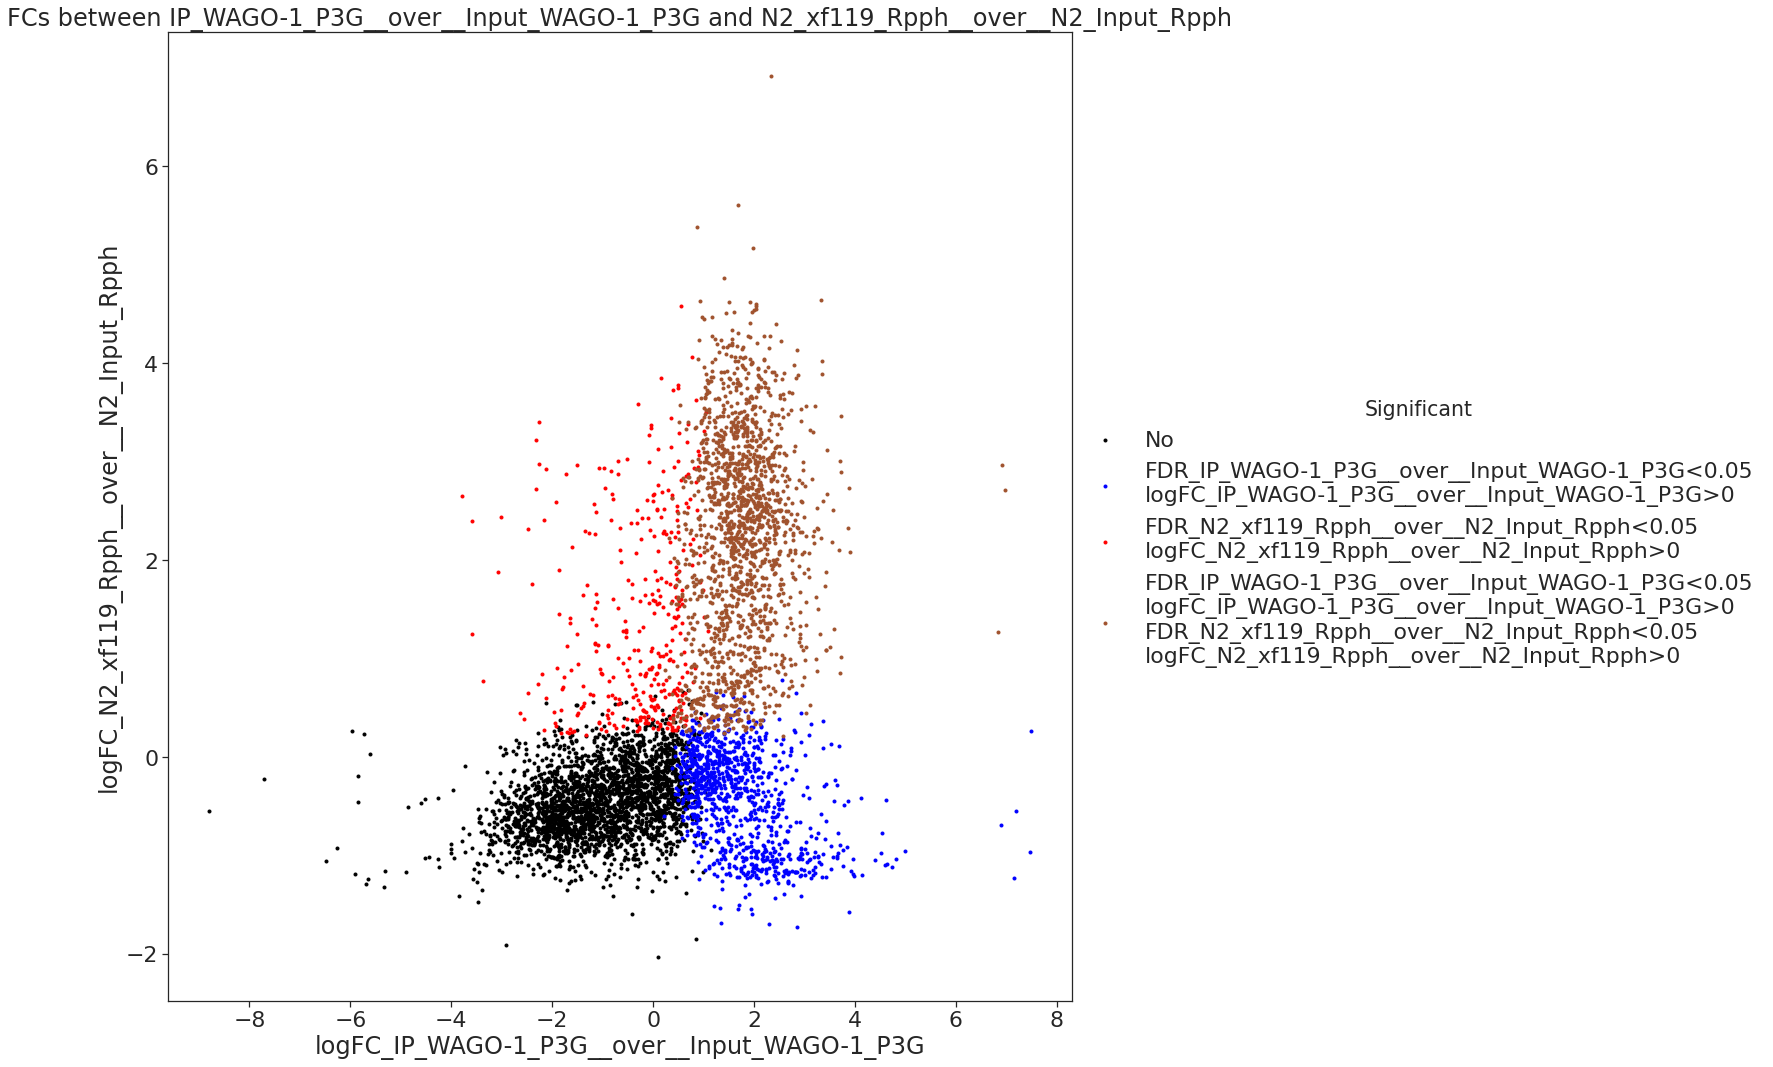

In [18]:
df_all = compare(df_1_path, df_2_path, df_1_name, df_2_name)

df_all["Significant"] = "No"

df_all.loc[(df_all[f"FDR_{df_1_name}"]<0.05) &
            (df_all[f"logFC_{df_1_name}"]>0),
            "Significant"] = f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0"

df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05) &
            (df_all[f"logFC_{df_2_name}"]>0),
            "Significant"] = f"FDR_{df_2_name}<0.05\nlogFC_{df_2_name}>0"

df_all.loc[(df_all[f"FDR_{df_1_name}"]<0.05) &
           (df_all[f"logFC_{df_1_name}"]>0) &
           (df_all[f"FDR_{df_2_name}"]<0.05) &
            (df_all[f"logFC_{df_2_name}"]>0),
            "Significant"] = f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0\nFDR_{df_2_name}<0.05\nlogFC_{df_2_name}>0"

plot_FC_correlation(df_all, df_1_name, df_2_name, "Significant", ["No", 
                                                                  f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0", 
                                                                  f"FDR_{df_2_name}<0.05\nlogFC_{df_2_name}>0",
                                                                  f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0\nFDR_{df_2_name}<0.05\nlogFC_{df_2_name}>0"])

pd.DataFrame(df_all["Significant"].value_counts())

# 4. IP_WAGO-1_dpf-3_null__over__Input_WAGO-1_dpf-3_null

In [19]:
df_1_path = ip__Input_WAGO_1_dpf_3_null__IP_WAGO_1_dpf_3_null_path
df_1_name = ip__Input_WAGO_1_dpf_3_null__IP_WAGO_1_dpf_3_null_name

df_2_path = ip_N2_Input_Rpph__N2_xf119_Rpph_path
df_2_name = ip_N2_Input_Rpph__N2_xf119_Rpph_name

,Significant
No,3326
FDR_IP_WAGO-1_dpf-3_null__over__Input_WAGO-1_dpf-3_null<0.05\nlogFC_IP_WAGO-1_dpf-3_null__over__Input_WAGO-1_dpf-3_null>0\nFDR_N2_xf119_Rpph__over__N2_Input_Rpph<0.05\nlogFC_N2_xf119_Rpph__over__N2_Input_Rpph>0,1672
FDR_IP_WAGO-1_dpf-3_null__over__Input_WAGO-1_dpf-3_null<0.05\nlogFC_IP_WAGO-1_dpf-3_null__over__Input_WAGO-1_dpf-3_null>0,1283
FDR_N2_xf119_Rpph__over__N2_Input_Rpph<0.05\nlogFC_N2_xf119_Rpph__over__N2_Input_Rpph>0,513


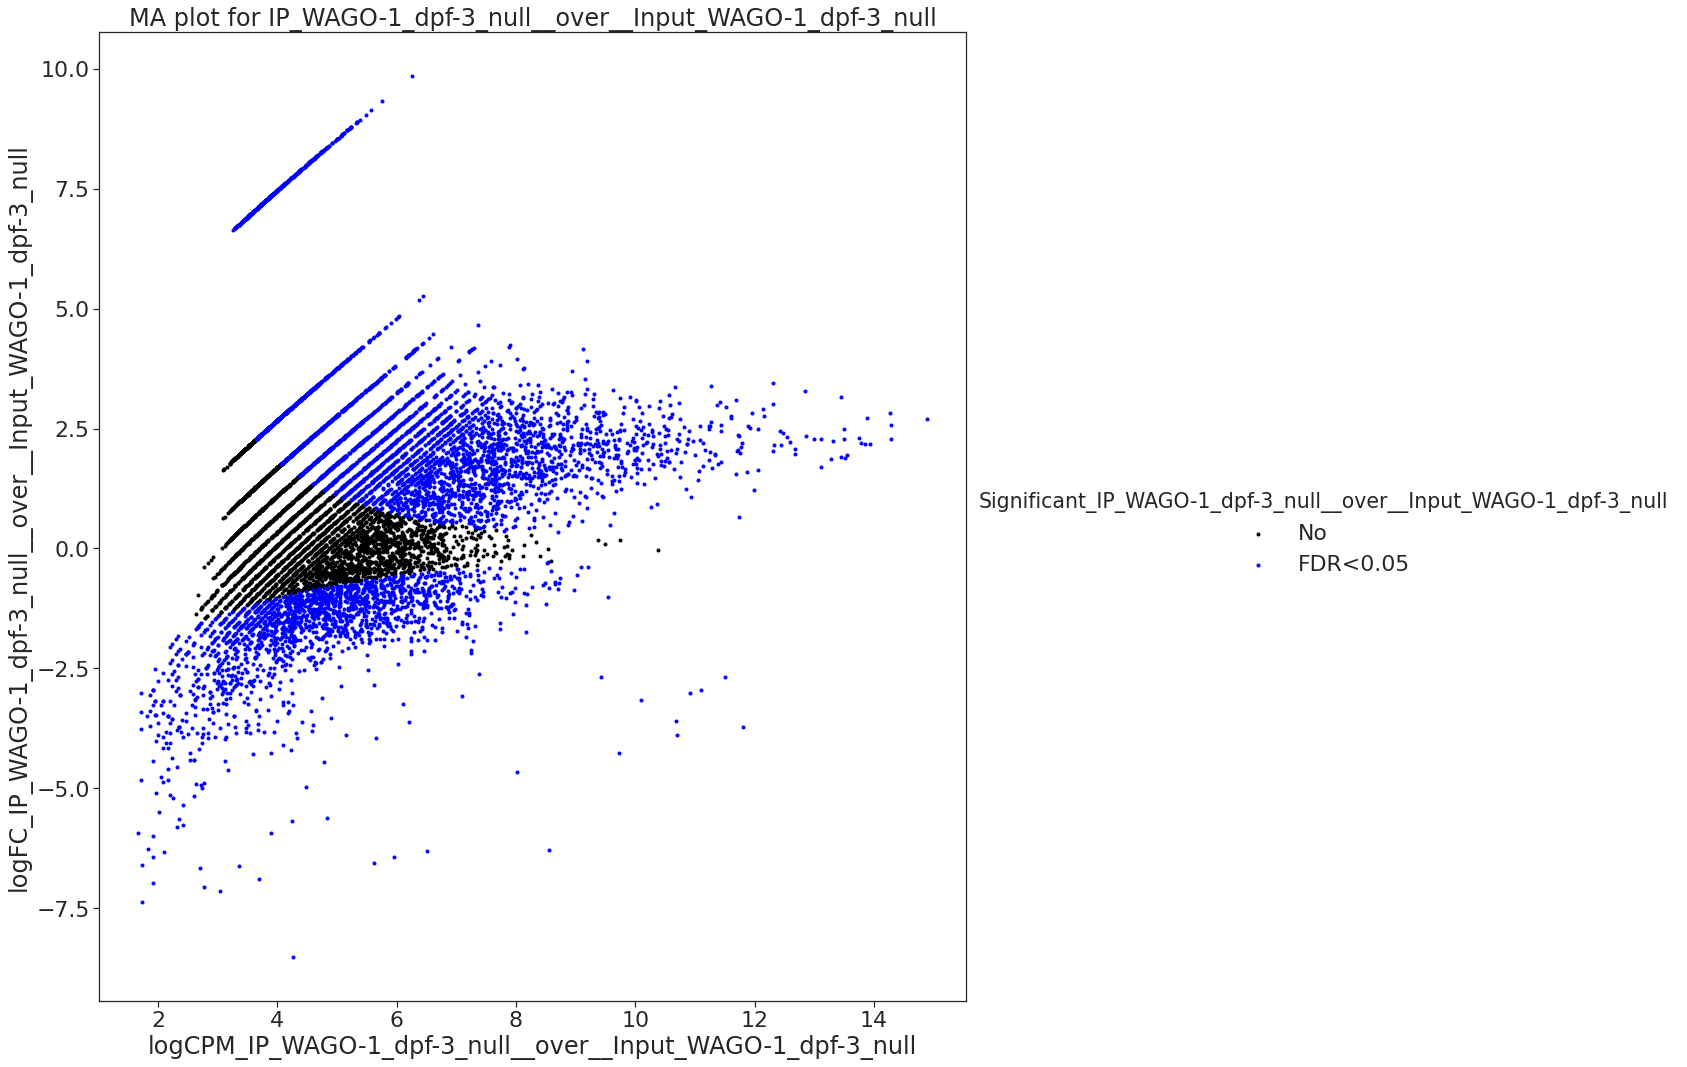

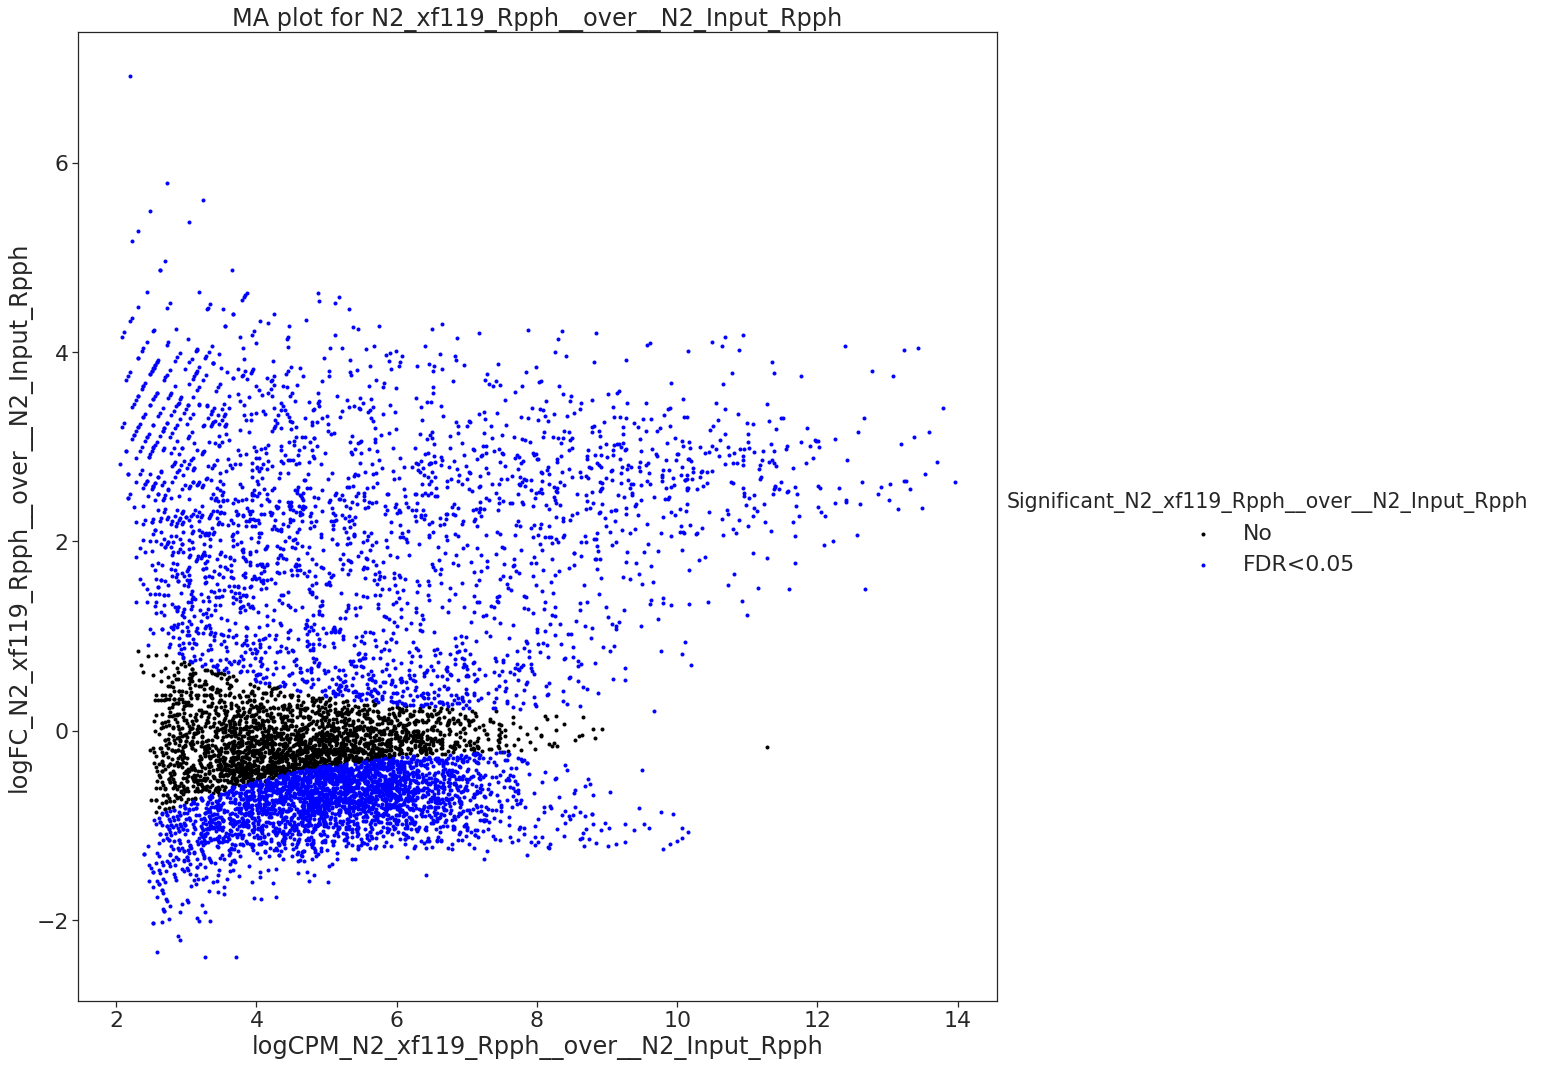

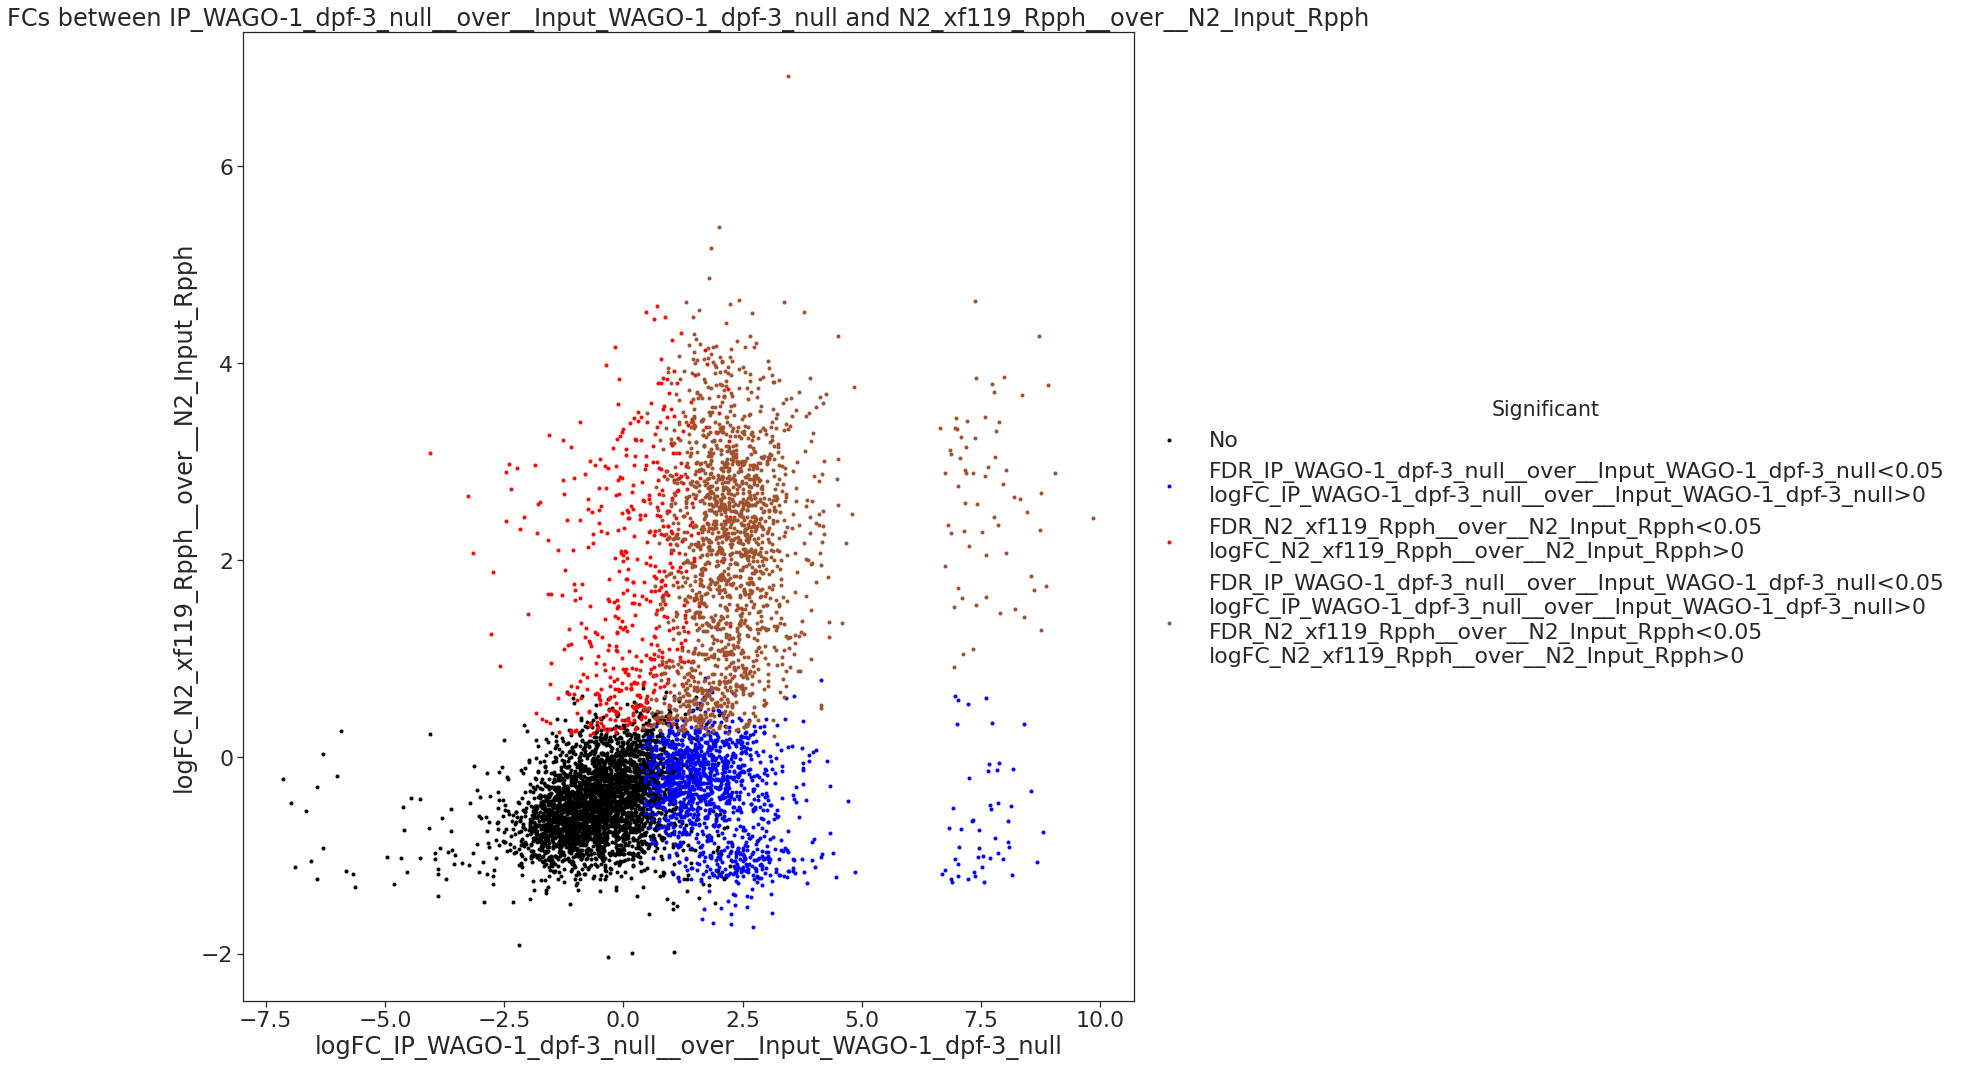

In [20]:
df_all = compare(df_1_path, df_2_path, df_1_name, df_2_name)

df_all["Significant"] = "No"

df_all.loc[(df_all[f"FDR_{df_1_name}"]<0.05) &
            (df_all[f"logFC_{df_1_name}"]>0),
            "Significant"] = f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0"

df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05) &
            (df_all[f"logFC_{df_2_name}"]>0),
            "Significant"] = f"FDR_{df_2_name}<0.05\nlogFC_{df_2_name}>0"

df_all.loc[(df_all[f"FDR_{df_1_name}"]<0.05) &
           (df_all[f"logFC_{df_1_name}"]>0) &
           (df_all[f"FDR_{df_2_name}"]<0.05) &
            (df_all[f"logFC_{df_2_name}"]>0),
            "Significant"] = f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0\nFDR_{df_2_name}<0.05\nlogFC_{df_2_name}>0"

plot_FC_correlation(df_all, df_1_name, df_2_name, "Significant", ["No", 
                                                                  f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0", 
                                                                  f"FDR_{df_2_name}<0.05\nlogFC_{df_2_name}>0",
                                                                  f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0\nFDR_{df_2_name}<0.05\nlogFC_{df_2_name}>0"])

pd.DataFrame(df_all["Significant"].value_counts())

# small_RNA_seq dpf-3 null over WT

In [21]:
WT__Dpf_3_null_path = small_rna_seq_prefix + "WT__Dpf_3_null" + suffix
WT__Dpf_3_null_name = "small_RNA_seq_Dpf_3_null__over__small_RNA_seq_Dpf_3_null_WT"

In [22]:
df_1_path = WT__Dpf_3_null_path
df_1_name = WT__Dpf_3_null_name

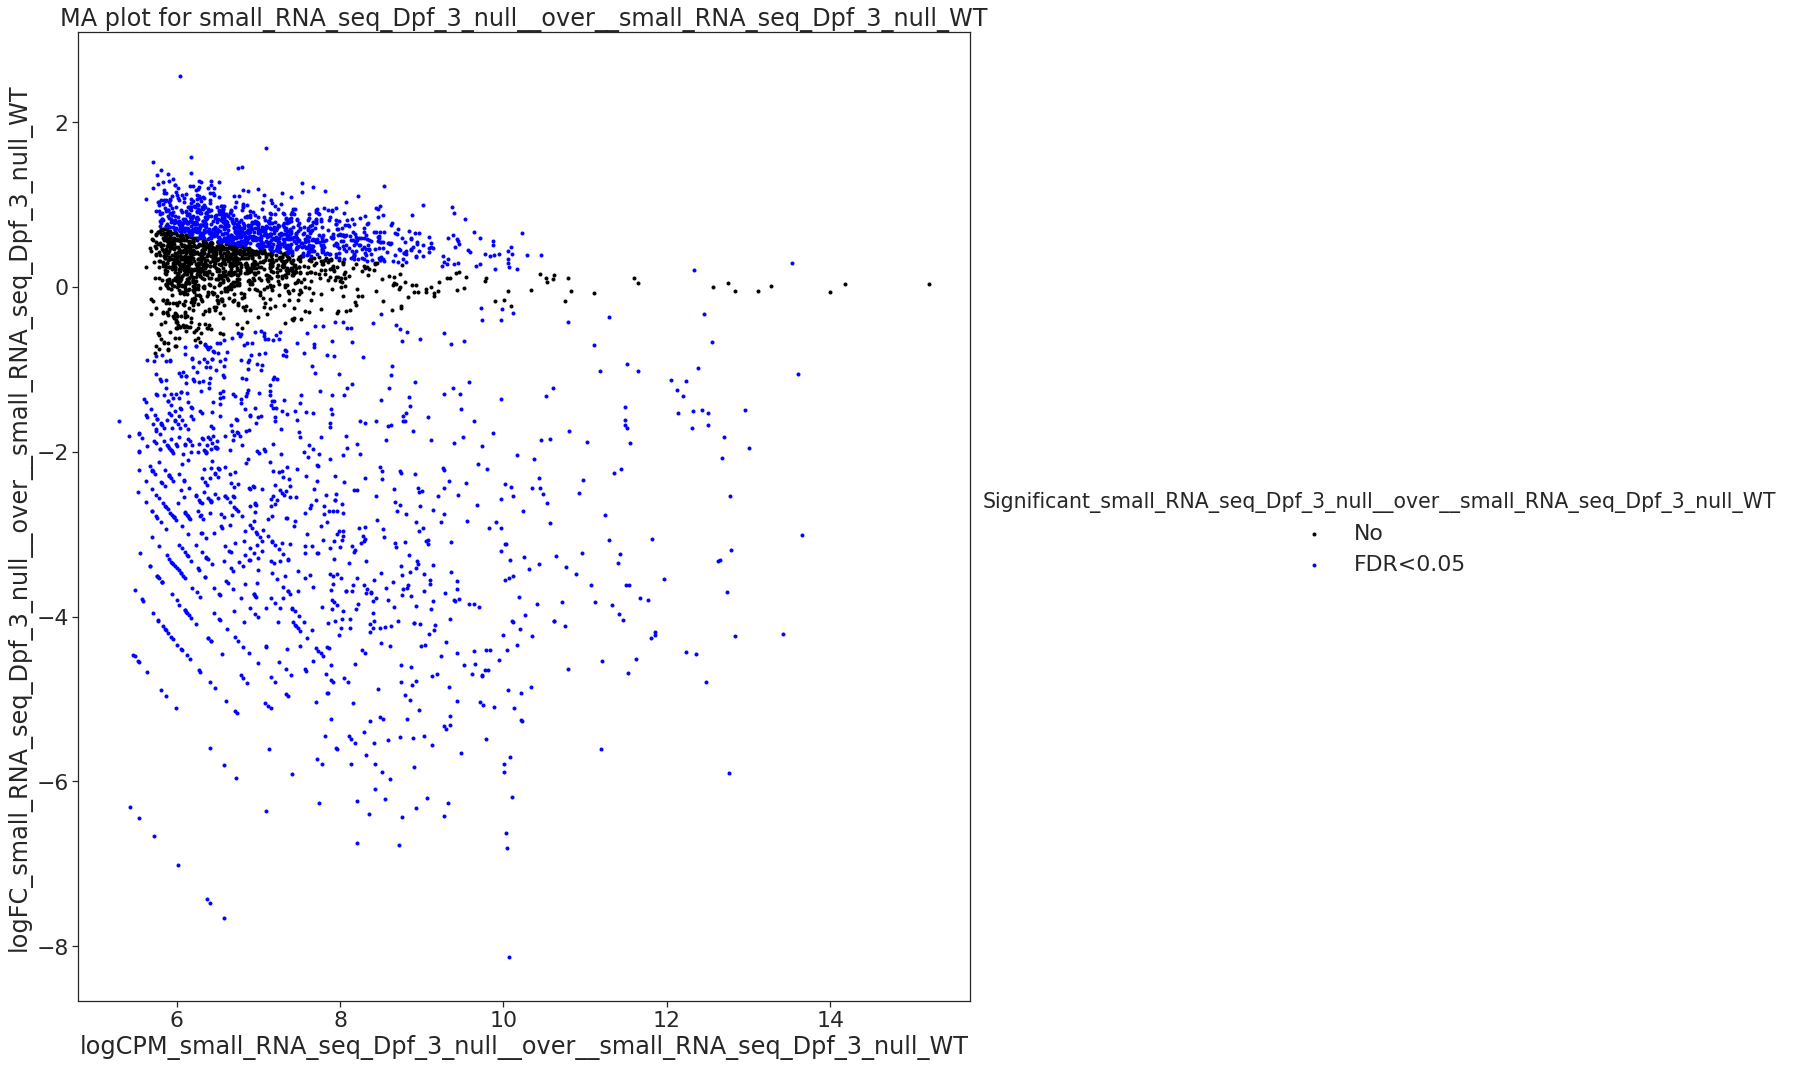

In [23]:
df_1 = prepare_df(df_1_path, df_1_name)
plot_MA(df_1, df_1_name)

In [24]:
dfp_3_null_downreulated = df_1[(df_1["logFC_small_RNA_seq_Dpf_3_null__over__small_RNA_seq_Dpf_3_null_WT"]<0) & (df_1["FDR_small_RNA_seq_Dpf_3_null__over__small_RNA_seq_Dpf_3_null_WT"]<0.05)].id.values.tolist()

# read in gene length

In [25]:
union_exons_bed = "../plots/correlation_plots_IPs/union_exons.bed"

In [26]:
union_bed = pd.read_csv(union_exons_bed, header=None, sep="\t")
union_bed.columns = ["chrom", "start", "end", "score", "gene_id", "strand"]
union_bed["length"] = union_bed["end"] - union_bed["start"]
gene_length = union_bed.groupby("gene_id")["length"].sum().reset_index()
gene_length.columns = ["Name", "length"]

In [27]:
gene_length.head()

,Name,length
0,I:10005952-10006427:+,476
1,I:10006437-10006683:+,247
2,I:1001335-1001573:-,239
3,I:10015772-10015842:+,71
4,I:1002040-1002265:-,226


# IP counts

In [28]:
counts = pd.read_csv("/tungstenfs/scratch/ggrossha/gypafoiv/projects/GROUP_PROJECTS/rajani/small_RNAs_Rajani/03_WAGO_IPs/results/counts/alignment_sorted_filtered_unique_mappers_reverse/counts.tsv",
                     header=0,
                     sep="\t")

In [29]:
counts.head()

,Name,counts_Input_WAGO-1_A,counts_Input_WAGO-1_B,counts_Input_WAGO-1_C,counts_Input_WAGO-1_dpf-3_null_A,counts_Input_WAGO-1_dpf-3_null_B,counts_Input_WAGO-1_dpf-3_null_C,counts_Input_WAGO-1_P3G_A,counts_Input_WAGO-1_P3G_B,counts_Input_WAGO-1_P3G_C,...,counts_IP_WAGO-3_C,counts_IP_WAGO-3_dpf-3_null_A,counts_IP_WAGO-3_dpf-3_null_B,counts_IP_WAGO-3_dpf-3_null_C,counts_IP_WAGO-4_A,counts_IP_WAGO-4_B,counts_IP_WAGO-4_C,counts_IP_WAGO-4_dpf-3_null_A,counts_IP_WAGO-4_dpf-3_null_B,counts_IP_WAGO-4_dpf-3_null_C
0,I:10005952-10006427:+,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,I:10006437-10006683:+,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,I:1001335-1001573:-,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,I:10015772-10015842:+,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,I:1002040-1002265:-,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
df = pd.merge(gene_length, counts, on="Name")

In [31]:
counts_wago_3_collab = pd.read_csv("../WAGO_3_IP/results/counts/alignment_sorted_filtered_unique_mappers_reverse/counts.tsv",
                                   header=0,
                                   sep="\t")

In [32]:
df = pd.merge(df, counts_wago_3_collab, on="Name")

In [33]:
df = df[df.sum(axis=1)>10]

In [34]:
# add pseudocount
df.iloc[:,2:] = df.iloc[:,2:] + 1

In [35]:
sample_reads = df.iloc[:,2:].copy()
gene_len = df.loc[:, ['length']]
rate = sample_reads.values / gene_len.values
tpm = pd.DataFrame(rate / np.sum(rate, axis=0).reshape(1, -1) * 1e6, columns=df.columns[2:], index=df.Name)
tpm = np.log2(tpm)

In [36]:
tpm.head()

,counts_Input_WAGO-1_A,counts_Input_WAGO-1_B,counts_Input_WAGO-1_C,counts_Input_WAGO-1_dpf-3_null_A,counts_Input_WAGO-1_dpf-3_null_B,counts_Input_WAGO-1_dpf-3_null_C,counts_Input_WAGO-1_P3G_A,counts_Input_WAGO-1_P3G_B,counts_Input_WAGO-1_P3G_C,counts_Input_WAGO-3_A,...,counts_IP_WAGO-4_C,counts_IP_WAGO-4_dpf-3_null_A,counts_IP_WAGO-4_dpf-3_null_B,counts_IP_WAGO-4_dpf-3_null_C,counts_N2_Input_Rep1_Rpph,counts_N2_Input_Rep2_Rpph,counts_N2_Input_Rep3_Rpph,counts_N2_xf119_Rep1_Rpph,counts_N2_xf119_Rep2_Rpph,counts_N2_xf119_Rep3_Rpph
Name,,,,,,,,,,,,,,,,,,,,,
I:10005952-10006427:+,1.531877,1.091559,1.305586,1.699132,1.749582,1.684850,1.589136,1.290924,1.540019,1.502847,...,1.454187,1.867378,1.840652,1.834207,0.295826,0.304774,1.398644,-0.723049,0.402347,-0.950837
I:10006437-10006683:+,2.478328,2.038009,2.252037,2.645583,2.696033,2.631300,2.535587,2.237375,2.486470,2.449297,...,2.400637,2.813828,2.787103,2.780657,1.242277,1.251225,1.345095,0.223401,0.348797,-0.004387
I:1001335-1001573:-,2.525828,2.085510,2.299537,2.693083,2.743533,2.678801,2.583087,2.284875,2.533970,2.496798,...,2.448138,2.861329,2.834603,2.828157,1.289777,1.298725,1.392595,0.270901,0.396297,0.043114
I:10015772-10015842:+,4.276948,3.836629,4.050657,4.444203,4.494653,4.429920,4.334207,4.035995,4.285090,4.247917,...,4.199258,4.612449,4.585723,4.579277,3.040897,3.049845,3.143715,2.022021,2.147417,1.794233
I:1002040-1002265:-,2.606516,2.166198,2.380225,2.773771,2.824221,2.759489,2.663775,2.365563,2.614658,2.577486,...,2.528826,2.942017,2.915291,2.908845,1.370465,1.379413,1.473283,0.351589,1.476985,0.123801


In [37]:
tpm.columns = tpm.columns.str.replace("counts_", "")

In [38]:
tpm["IP_WAGO-1_mean"] = tpm[["IP_WAGO-1_A", "IP_WAGO-1_B", "IP_WAGO-1_C"]].mean(axis=1)

In [39]:
tpm["IP_WAGO-1_dpf-3_null_mean"] = tpm[["IP_WAGO-1_dpf-3_null_A", "IP_WAGO-1_dpf-3_null_B", "IP_WAGO-1_dpf-3_null_C"]].mean(axis=1)

In [40]:
tpm["IP_WAGO-1_P3G_mean"] = tpm[["IP_WAGO-1_P3G_A", "IP_WAGO-1_P3G_B", "IP_WAGO-1_P3G_C"]].mean(axis=1)

In [41]:
tpm["IP_WAGO-3_mean"] = tpm[["IP_WAGO-3_A", "IP_WAGO-3_B", "IP_WAGO-3_C"]].mean(axis=1)

In [42]:
tpm["IP_WAGO-3_dpf-3_null_mean"] = tpm[["IP_WAGO-3_dpf-3_null_A", "IP_WAGO-3_dpf-3_null_B", "IP_WAGO-3_dpf-3_null_C"]].mean(axis=1)

In [43]:
tpm["N2_xf119_Rpph_mean"] = tpm[["N2_xf119_Rep1_Rpph", "N2_xf119_Rep2_Rpph", "N2_xf119_Rep3_Rpph"]].mean(axis=1)

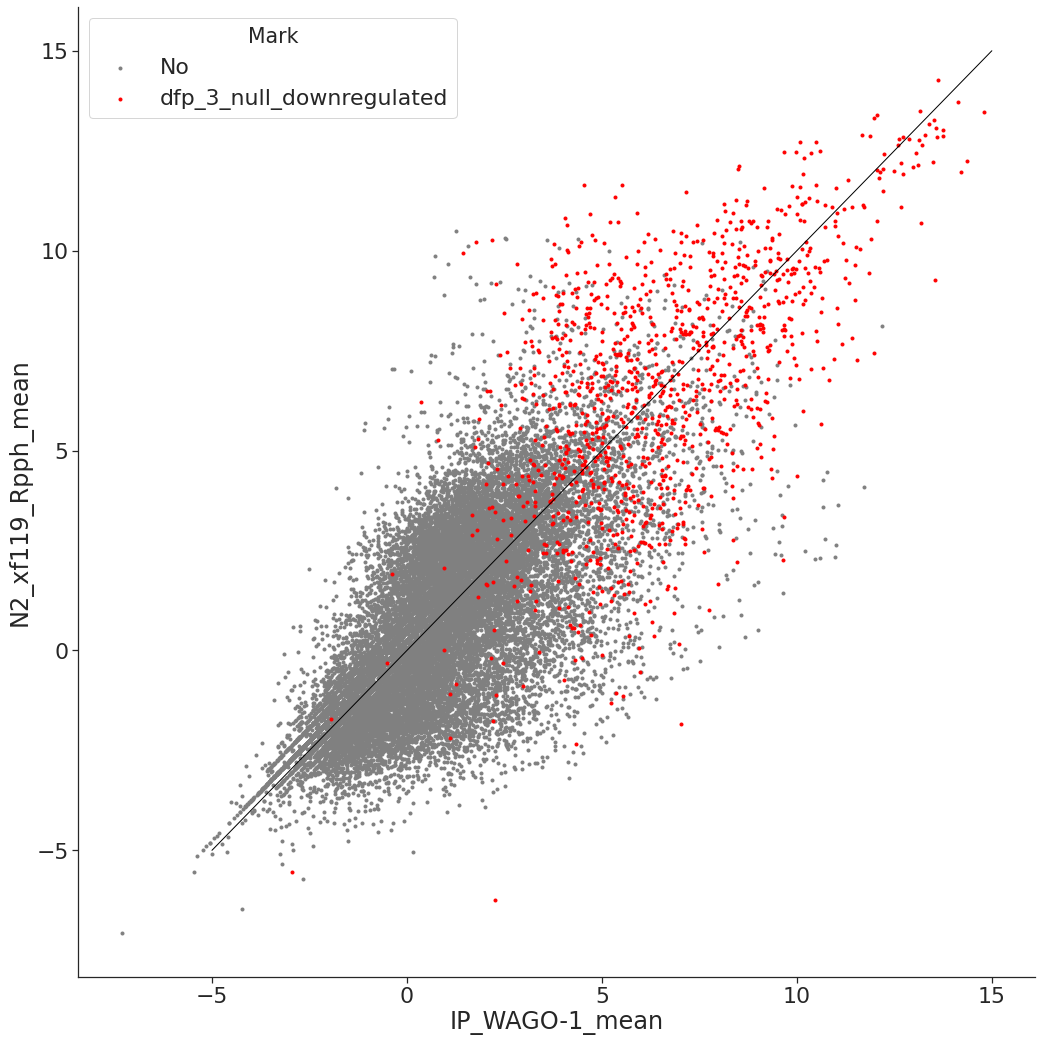

In [44]:
tpm["Mark"] = "No"
tpm.loc[tpm.index.isin(dfp_3_null_downreulated), "Mark"] = "dfp_3_null_downregulated"

sns_plot = sns.lmplot(x=f"IP_WAGO-1_mean",
                      y=f"N2_xf119_Rpph_mean",
                      data=tpm,
                      fit_reg=False,
                      palette=["grey", "red"],
                      hue="Mark",
                      scatter_kws={'alpha':alpha},
                      height=height,
                      aspect=aspect,
                      x_jitter=x_jitter,
                      y_jitter=y_jitter,
                      markers=marker,
                      legend=legend,
                      legend_out = legend_out)

ident = [-5, 15]
plt.plot(ident, ident, color="black", linewidth=1)

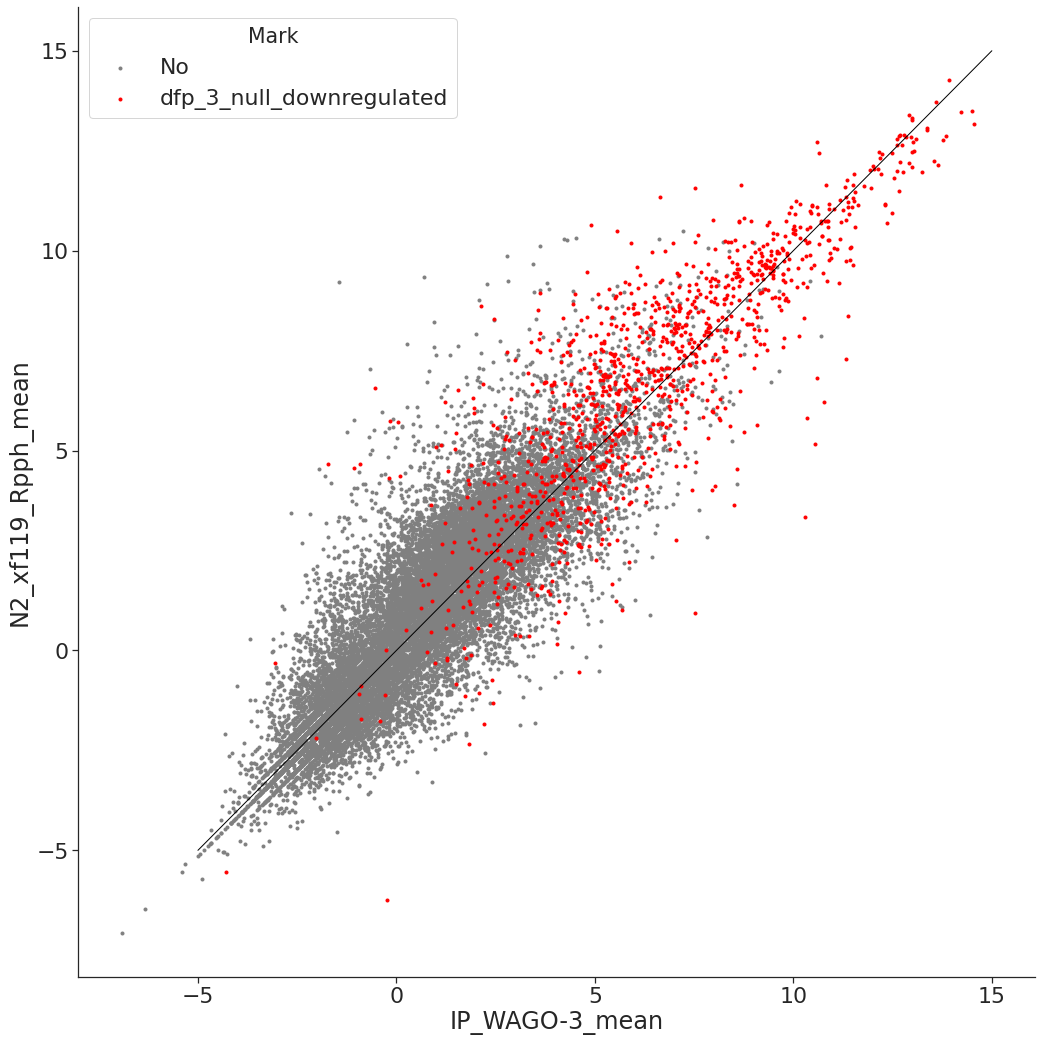

In [45]:
tpm["Mark"] = "No"
tpm.loc[tpm.index.isin(dfp_3_null_downreulated), "Mark"] = "dfp_3_null_downregulated"

sns_plot = sns.lmplot(x=f"IP_WAGO-3_mean",
                      y=f"N2_xf119_Rpph_mean",
                      data=tpm,
                      fit_reg=False,
                      palette=["grey", "red"],
                      hue="Mark",
                      scatter_kws={'alpha':alpha},
                      height=height,
                      aspect=aspect,
                      x_jitter=x_jitter,
                      y_jitter=y_jitter,
                      markers=marker,
                      legend=legend,
                      legend_out = legend_out)

ident = [-5, 15]
plt.plot(ident, ident, color="black", linewidth=1)

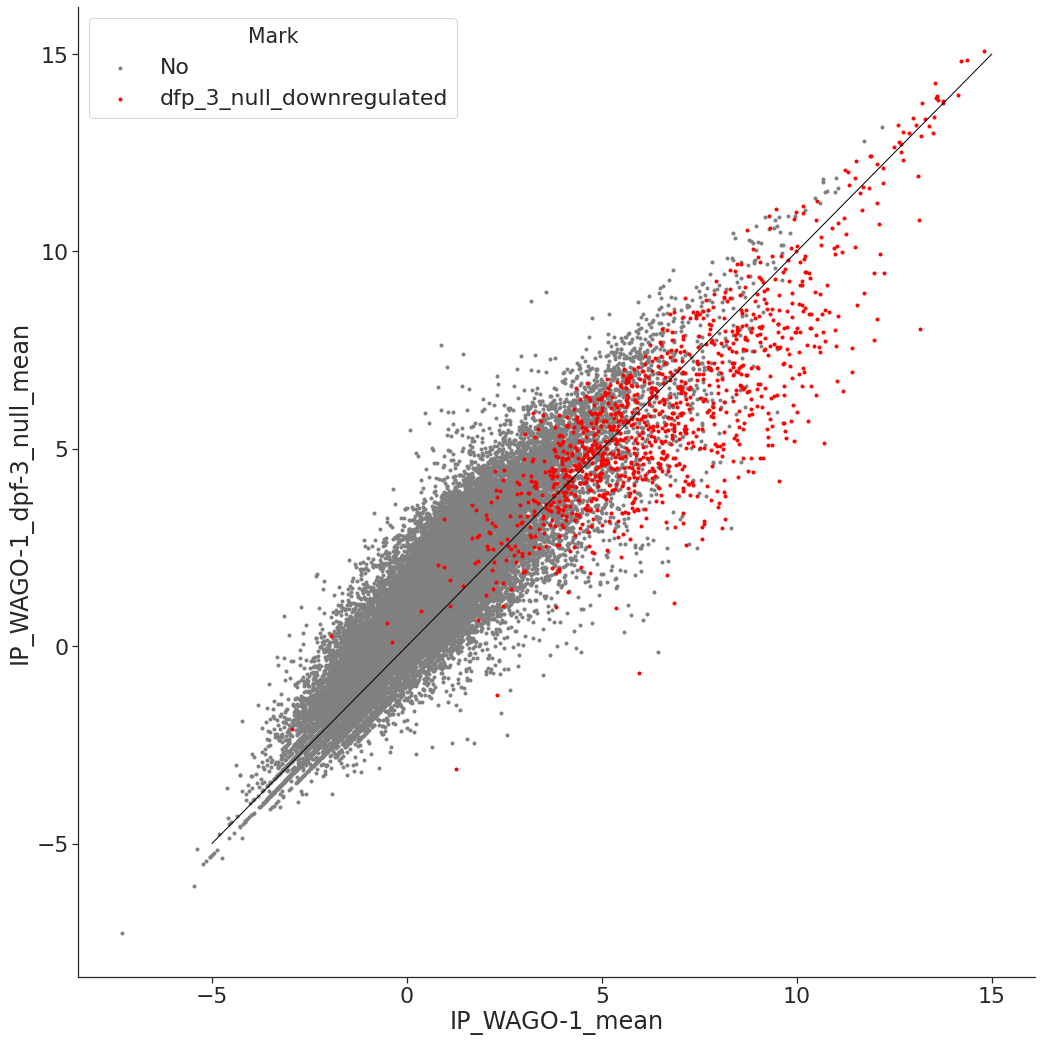

In [46]:
tpm["Mark"] = "No"
tpm.loc[tpm.index.isin(dfp_3_null_downreulated), "Mark"] = "dfp_3_null_downregulated"


sns_plot = sns.lmplot(x=f"IP_WAGO-1_mean",
                      y=f"IP_WAGO-1_dpf-3_null_mean",
                      data=tpm,
                      fit_reg=False,
                      palette=["grey", "red"],
                      hue="Mark",
                      scatter_kws={'alpha':alpha},
                      height=height,
                      aspect=aspect,
                      x_jitter=x_jitter,
                      y_jitter=y_jitter,
                      markers=marker,
                      legend=legend,
                      legend_out = legend_out)

ident = [-5, 15]
plt.plot(ident, ident, color="black", linewidth=1)

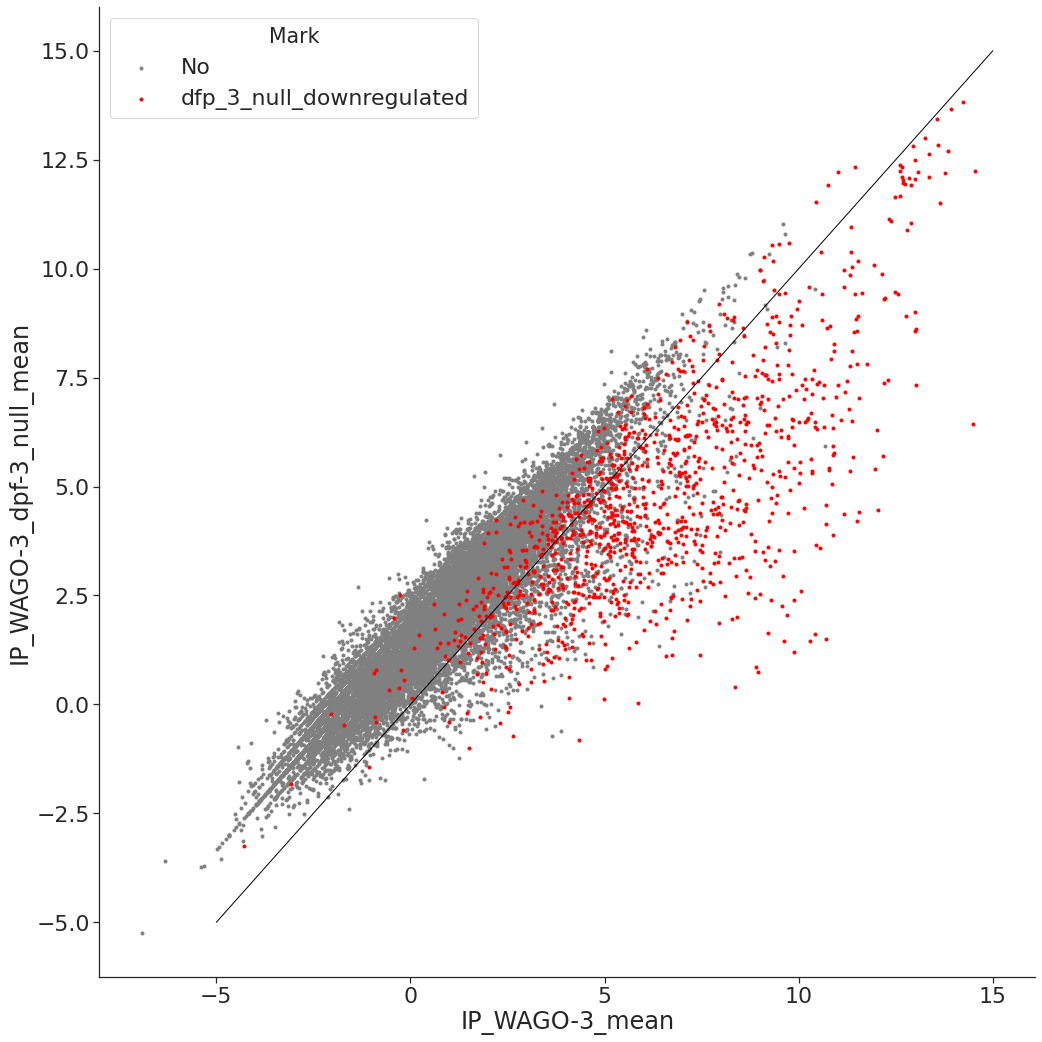

In [47]:
tpm["Mark"] = "No"
tpm.loc[tpm.index.isin(dfp_3_null_downreulated), "Mark"] = "dfp_3_null_downregulated"

sns_plot = sns.lmplot(x=f"IP_WAGO-3_mean",
                      y=f"IP_WAGO-3_dpf-3_null_mean",
                      data=tpm,
                      fit_reg=False,
                      palette=["grey", "red"],
                      hue="Mark",
                      scatter_kws={'alpha':alpha},
                      height=height,
                      aspect=aspect,
                      x_jitter=x_jitter,
                      y_jitter=y_jitter,
                      markers=marker,
                      legend=legend,
                      legend_out = legend_out)

ident = [-5, 15]
plt.plot(ident, ident, color="black", linewidth=1)